# Summary

This analysis is conducted by data scientist consultants advising the marketing department to gain insights on app downloading behavior through unsupervised learning machine learning. 

The characteristics representing the technological, personality, and purchase behaviors were determined using principal component analysis, and then agglomerative clustering was done to divide the personas into four clusters.

Key Findings: 
   - Regarding the marketing campaign needed to be done for each type of mobile application, we should consider that 50% of the users use IOS applications whereas 36% use Android applications. 
   - Females represented 53% of all the surveyed personas. This should also be considered regarding which type of applications to advertise and on which websites and applications the ads should take place. 
   - 70% of the people had three or four applications on their devices. 

Recommendations: 

As for Cluster 1, our recommendation was to target the ads for popular social media networks and search engines' respective applications. This cluster includes normal consumers using social media, art, online shopping, and news apps.

The recommendation for Cluster 2 was to advertise technical applications such as designing, gaming, shopping apps that include packaged deals since this cluster tends to be frugal consumers. Applications should consist of deals, and the marketing campaign could place the ads on existing shopping, design, and gaming apps. Moreover, it is best for this cluster to have incentives and rewards for using the mobile app version instead of in-person shopping.

Cluster 3 represents most of the users being normal users and savvy technologists. The marketing department could target new social media apps such as podcasts and other shopping apps related to existing brands, which would give a larger sale while using the mobile app instead of shopping in person.

For Cluster 4, we strongly recommend that the marketing department advertises to this group its more complex technology apps related to Cloud systems and Mail applications since they tend to be more technological as their age and income increase. Moreover, social media-related, gaming, and music apps can be targeted for this cluster because they are more likely to be impulsive buyers and don't mind purchasing in-app purchases and subscriptions.


In [2]:
# importing packages

import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualization
import sys                      # system-specific parameters and functions
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

# reading the file into Python
team_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [3]:
#Printing the columns names by using columns function.
team_df.columns

Index(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57'], dtype='object')

In [4]:
#Defining scree plot function

def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()



# Defining unsupervised_scaler function

def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [5]:
#printing the first five rows of the data set
team_df.head(n = 5)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


In [6]:
# analyzing the decriptive statistics of each feature.
team_df.describe(include = 'number').round(decimals = 2)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
count,1552.00,1552.00,1552.0,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00
mean,1192.85,4.51,0.5,0.24,0.36,0.2,0.06,0.09,0.04,0.19,0.04,0.0,0.69,0.19,0.46,0.27,0.76,0.81,0.53,0.47,0.35,0.08,0.02,3.08,4.22,1.41,2.72,3.31,2.44,3.22,1.61,3.41,3.34,2.82,2.70,3.11,2.46,3.16,1.70,2.22,3.24,2.87,1.81,2.07,1.99,3.81,2.05,2.44,1.98,2.37,2.46,2.24,2.27,2.38,4.29,2.12,2.66,2.16,2.18,2.44,2.75,3.02,2.15,3.00,3.00,3.04,3.25,3.28,2.59,2.80,3.86,3.10,3.33,3.32,2.42,3.12,2.55,3.58,1.90,0.5,0.19,0.18,0.15,0.16,1.73,1.85,7.80,1.53
std,712.01,2.40,0.5,0.43,0.48,0.4,0.23,0.28,0.20,0.40,0.19,0.0,0.46,0.39,0.50,0.44,0.42,0.39,0.50,0.50,0.48,0.27,0.13,1.02,1.34,0.88,1.24,1.01,1.18,1.07,0.80,0.96,0.99,1.17,1.18,1.07,1.26,1.54,0.96,1.40,1.57,1.45,1.05,1.10,1.04,1.61,1.09,1.28,1.03,1.12,1.22,1.08,1.10,1.17,1.55,1.05,1.24,1.12,1.14,1.17,1.33,1.51,1.16,1.41,1.33,1.42,1.47,1.46,1.36,1.36,1.76,1.42,1.53,1.42,1.19,1.44,1.28,1.22,0.93,0.5,0.39,0.39,0.35,0.37,1.49,0.36,3.72,0.50
min,1.00,1.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,570.75,2.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,1.00,1.00,3.00,1.00,2.00,1.00,3.00,3.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,2.00,5.00,1.00
50%,1144.50,4.00,1.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,3.00,4.00,1.00,3.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,1.00,2.00,3.00,3.00,1.00,2.00,2.00,4.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,2.00,3.00,2.00,2.00,2.00,3.00,3.00,2.00,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,1.00,2.00,7.50,2.00
75%,1833.50,6.00,1.0,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,5.00,1.00,4.00,4.00,4.00,4.00,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,2.00,3.00,4.00,4.00,2.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,6.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,6.00,4.00,4.00,4.00,3.00,4.00,3.00,4.00,2.00,1.0,0.00,0.00,0.00,0.00,2.00,2.00,11.00,2.00
max,2396.00,11.00,1.0,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,6.0

In [7]:
#printing the data frame information.
team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

In [8]:
#checking missing values.
team_df.isnull().any().any()

False

In [9]:
#Renaming each column for better understanding and analysis. 
# setting the new names in col_dictionary list
col_dictionary = [  'caseID',
                    'age_groups',
                    'iphone',
                    'ipod',
                    'android',
                    'blackberry',
                    'Nokia',
                    'windows_ph',
                    'hp',
                    'tablet',
                    'other_phone',
                    'no_phone',
                    'music_app',
                    'tv_checkin_app',
                    'entertainment_app',
                    'tv_show_app',
                    'gaming_app',
                    'social_network_app',
                    'news_app',
                    'shopping_app',
                    'public_news_app',
                    'other_app',
                    'no_app',
                    'number_apps',
                    '%_free_apps',
                    'facebook',
                    'twitter',
                    'mySpace',
                    'pandora_radio',
                    'vevo',
                    'youtube',
                    'aol_radio',
                    'last.fm',
                    'yahoo_entertainment',
                    'imdb',
                    'linkedin',
                    'netflix',
                    'keep_up_with_technology',
                    'ask_me_advice_technology',
                    'enjoy_purchasing_technology',
                    'too_much_technology',
                    'enjoy_control_technology',
                    'save_time_use_apps',
                    'music_important_in_life',
                    'learn_tv_shows',
                    'too_much_info_online',
                    'checking_friends_facebook',
                    'internet_easier_for_family',
                    'internet_easy_for_avoidin_family_friends',
                    'opinion_leader',
                    'stand_out_from_others',
                    'offers_advice',
                    'lead_decision_making',
                    'first_to_try_new_things',
                    'responsibility_overrated',
                    'like_being_in_control',
                    'risk_taker',
                    'creative',
                    'optimistic',
                    'very_active',
                    'stretched_for_time',
                    'look_for_deals',
                    'enjoy_shopping',
                    'like_package_deals',
                    'always_shopping_online',
                    'attracted_luxury_brands',
                    'prefer_designer_brands',
                    'cant_get_enough_apps',
                    'how_much_apps_are_cool_matters',
                    'love_showing_new_apps',
                    'children_impact_apps',
                    'worth_spending_on_apps',
                    'agree_on_always_spending_money_i_earn',
                   'influenced_by_what_is_hot',
                   'buy_brands_style',
                   'make_impulse_purchases',
                  'mobile_phone_source_entertainment',
                   'Education',
                   'Marital Status',
                   'No children',
                   'Yes, children under 6 years old',
                   'Yes, children 6-12 years old',
                   'Yes, children 13-17 years old',
                   'Yes, children 18 or older',
                    'Race',
                    'Hispanic',
                    'income',
                    'Gender']

In [10]:
#asigning the dictionary values to the data frame. 
team_df.columns = col_dictionary

In [11]:
team_df.head(n=5)

,caseID,age_groups,iphone,ipod,android,blackberry,Nokia,windows_ph,hp,tablet,other_phone,no_phone,music_app,tv_checkin_app,entertainment_app,tv_show_app,gaming_app,social_network_app,news_app,shopping_app,public_news_app,other_app,no_app,number_apps,%_free_apps,facebook,twitter,mySpace,pandora_radio,vevo,youtube,aol_radio,last.fm,yahoo_entertainment,imdb,linkedin,netflix,keep_up_with_technology,ask_me_advice_technology,enjoy_purchasing_technology,too_much_technology,enjoy_control_technology,save_time_use_apps,music_important_in_life,learn_tv_shows,too_much_info_online,checking_friends_facebook,internet_easier_for_family,internet_easy_for_avoidin_family_friends,opinion_leader,stand_out_from_others,offers_advice,lead_decision_making,first_to_try_new_things,responsibility_overrated,like_being_in_control,risk_taker,creative,optimistic,very_active,stretched_for_time,look_for_deals,enjoy_shopping,like_package_deals,always_shopping_online,attracted_luxury_brands,prefer_designer_brands,cant_get_enough_apps,how_much_apps_are_cool_matters,love_showing_new_apps,children_impact_apps,worth_spending_on_apps,agree_on_always_spending_money_i_earn,influenced_by_what_is_hot,buy_brands_style,make_impulse_purchases,mobile_phone_source_entertainment,Education,Marital Status,No children,"Yes, children under 6 years old","Yes, children 6-12 years old","Yes, children 13-17 years old","Yes, children 18 or older",Race,Hispanic,income,Gender
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


In [12]:
#Running descriptive statistics
team_df.describe(include = 'number').round(decimals = 2)

,caseID,age_groups,iphone,ipod,android,blackberry,Nokia,windows_ph,hp,tablet,other_phone,no_phone,music_app,tv_checkin_app,entertainment_app,tv_show_app,gaming_app,social_network_app,news_app,shopping_app,public_news_app,other_app,no_app,number_apps,%_free_apps,facebook,twitter,mySpace,pandora_radio,vevo,youtube,aol_radio,last.fm,yahoo_entertainment,imdb,linkedin,netflix,keep_up_with_technology,ask_me_advice_technology,enjoy_purchasing_technology,too_much_technology,enjoy_control_technology,save_time_use_apps,music_important_in_life,learn_tv_shows,too_much_info_online,checking_friends_facebook,internet_easier_for_family,internet_easy_for_avoidin_family_friends,opinion_leader,stand_out_from_others,offers_advice,lead_decision_making,first_to_try_new_things,responsibility_overrated,like_being_in_control,risk_taker,creative,optimistic,very_active,stretched_for_time,look_for_deals,enjoy_shopping,like_package_deals,always_shopping_online,attracted_luxury_brands,prefer_designer_brands,cant_get_enough_apps,how_much_apps_are_cool_matters,love_showing_new_apps,children_impact_apps,worth_spending_on_apps,agree_on_always_spending_money_i_earn,influenced_by_what_is_hot,buy_brands_style,make_impulse_purchases,mobile_phone_source_entertainment,Education,Marital Status,No children,"Yes, children under 6 years old","Yes, children 6-12 years old","Yes, children 13-17 years old","Yes, children 18 or older",Race,Hispanic,income,Gender
count,1552.00,1552.00,1552.0,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.0,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00
mean,1192.85,4.51,0.5,0.24,0.36,0.2,0.06,0.09,0.04,0.19,0.04,0.0,0.69,0.19,0.46,0.27,0.76,0.81,0.53,0.47,0.35,0.08,0.02,3.08,4.22,1.41,2.72,3.31,2.44,3.22,1.61,3.41,3.34,2.82,2.70,3.11,2.46,3.16,1.70,2.22,3.24,2.87,1.81,2.07,1.99,3.81,2.05,2.44,1.98,2.37,2.46,2.24,2.27,2.38,4.29,2.12,2.66,2.16,2.18,2.44,2.75,3.02,2.15,3.00,3.00,3.04,3.25,3.28,2.59,2.80,3.86,3.10,3.33,3.32,2.42,3.12,2.55,3.58,1.90,0.5,0.19,0.18,0.15,0.16,1.73,1.85,7.80,1.53
std,712.01,2.40,0.5,0.43,0.48,0.4,0.23,0.28,0.20,0.40,0.19,0.0,0.46,0.39,0.50,0.44,0.42,0.39,0.50,0.50,0.48,0.27,0.13,1.02,1.34,0.88,1.24,1.01,1.18,1.07,0.80,0.96,0.99,1.17,1.18,1.07,1.26,1.54,0.96,1.40,1.57,1.45,1.05,1.10,1.04,1.61,1.09,1.28,1.03,1.12,1.22,1.08,1.10,1.17,1.55,1.05,1.24,1.12,1.14,1.17,1.33,1.51,1.16,1.41,1.33,1.42,1.47,1.46,1.36,1.36,1.76,1.42,1.53,1.42,1.19,1.44,1.28,1.22,0.93,0.5,0.39,0.39,0.35,0.37,1.49,0.36,3.72,0.50
min,1.00,1.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,570.75,2.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2.00,3.00,1.00,1.00,3.00,1.00,2.00,1.00,3.00,3.00,2.00,2.00,2.00,1.00,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,0.0,0.00,0.00,0.00,0.00,1.00,2.00,5.00,1.00
50%,1144.50,4.00,1.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,1.0

In [13]:
# #checking the histogram of income having 12 value counts
# # setting figure size
# fig, ax = plt.subplots(figsize = (12, 8))


# sns.histplot(x = team_df['income'])


# # formatting, saving, and displaying the plot
# plt.tight_layout()
# #plt.savefig('./team_df_histograms.png')
# plt.show()

In [14]:
#Checking the skewness of income
team_df['income'].skew()

0.036354293557490217

Separating each variable into two categories: demographic and psychometric. Notice that each psychometric question has been separated into 3 different lists because we consider that they instantiate different information

In [15]:
#This is the info for the questions that are neither demographic nor psychometric
download_info_demographic = ['iphone','ipod','android','blackberry','Nokia','windows_ph',
                 'hp','tablet','other_phone','no_phone','music_app',
                 'tv_checkin_app','entertainment_app','tv_show_app',
                 'gaming_app','social_network_app','news_app','shopping_app',
                 'public_news_app','other_app','no_app','number_apps','%_free_apps',
                 'facebook','twitter','mySpace','pandora_radio','vevo','youtube','aol_radio',
                 'last.fm','yahoo_entertainment','imdb','linkedin','netflix']

#This the info for the first pyschometric grouped data added to it the number of applications used by the person
psychometric_info_1 = ['keep_up_with_technology','ask_me_advice_technology','enjoy_purchasing_technology',
                     'too_much_technology','enjoy_control_technology','save_time_use_apps','music_important_in_life',
                     'learn_tv_shows','too_much_info_online','checking_friends_facebook','internet_easier_for_family',
                     'internet_easy_for_avoidin_family_friends']

#This is the info for the second psychometric grouped data which is the question about personality
psychometric_info_2 = ['opinion_leader','stand_out_from_others','offers_advice','lead_decision_making',
                       'first_to_try_new_things','responsibility_overrated','like_being_in_control','risk_taker',
                       'creative','optimistic','very_active','stretched_for_time']

#This is the info tor the third pyschometric grouped data which describes the consumer_behavior
psychometric_info_3 = ['look_for_deals','enjoy_shopping','like_package_deals','always_shopping_online','attracted_luxury_brands',
                       'prefer_designer_brands','cant_get_enough_apps','how_much_apps_are_cool_matters','love_showing_new_apps',
                       'children_impact_apps','worth_spending_on_apps','agree_on_always_spending_money_i_earn','%_free_apps',
                       'influenced_by_what_is_hot','buy_brands_style','make_impulse_purchases',
                       'mobile_phone_source_entertainment']

#This is the demographic data
demographic_info = ['age_groups','Education','Marital Status','No children','Yes, children under 6 years old',
                    'Yes, children 6-12 years old','Yes, children 13-17 years old','Yes, children 18 or older','Race',
                    'Hispanic','income','Gender']

#Creating the pca's for the psychometric questions. Notice that we decided to scale by rows first and then by columns to remove bias answers.

In [16]:
# locating first pca information
pyschometric_technology = team_df.loc[ : , ['keep_up_with_technology','ask_me_advice_technology','enjoy_purchasing_technology',
                     'too_much_technology','enjoy_control_technology','save_time_use_apps','music_important_in_life',
                     'learn_tv_shows','too_much_info_online','checking_friends_facebook','internet_easier_for_family',
                     'internet_easy_for_avoidin_family_friends'] ]

#transposing to scale the rows.  
pychometric_technology_transposed = pyschometric_technology.transpose()
pychometric_technology_transposed.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551
keep_up_with_technology,5,1,5,2,3,6,4,6,5,3,2,1,6,5,4,5,5,2,6,4,2,3,3,2,6,5,3,6,3,2,1,5,1,6,5,1,5,5,2,3,2,3,4,2,2,1,6,1,4,5,2,3,4,4,3,3,2,5,1,2,5,1,2,6,2,1,2,4,3,2,2,1,3,1,2,1,3,1,2,4,4,3,1,3,1,3,4,3,1,4,2,3,6,2,3,4,6,1,3,2,4,5,1,1,5,6,2,2,1,4,4,4,3,3,2,2,6,3,3,2,4,3,3,2,2,1,2,2,2,1,2,4,5,1,5,4,3,5,5,4,2,3,3,5,5,4,2,2,5,2,2,1,2,3,3,4,2,4,3,3,1,3,1,3,2,1,3,1,1,3,2,6,4,3,1,1,6,2,4,4,4,4,3,1,2,3,3,6,1,1,4,3,3,6,3,1,1,4,5,3,1,1,4,2,4,2,1,6,5,4,1,5,4,1,4,3,2,2,1,3,2,1,3,2,1,5,2,2,4,1,1,3,4,2,3,5,1,5,3,6,2,3,3,6,3,4,2,4,5,6,...,4,5,6,4,2,4,3,5,2,5,3,6,4,3,2,4,3,1,5,2,6,4,4,5,3,4,2,5,2,5,3,2,4,2,3,5,3,2,1,3,5,6,2,6,3,2,6,1,2,4,1,4,6,4,2,1,3,1,3,1,2,4,5,3,3,4,5,1,3,2,4,1,6,2,2,2,2,5,1,3,1,4,1,3,3,2,3,3,1,6,1,2,3,1,3,1,2,4,3,2,5,3,4,2,1,1,1,3,3,1,2,5,1,3,1,5,2,1,2,3,2,2,1,2,2,4,3,3,6,1,3,4,4,2,2,4,3,1,2,3,1,2,5,2,3,2,3,3,2,2,2,3,3,2,4,3,6,3,2,5,5,3,3,2,1,1,4,3,5,2,1,2,3,5,4,2,4,3,1,3,3,4,2,2,4,2,3,3,3,3,2,4,3,2,3,2,6,1,1,2,3,2,4,3,2,3,4,4,4,5,2,2,1,4,4,2,3,3,3,2,3,3,1,6,6,2,1,6,3,3,1,4,4,4,4,1,1,1,3,2,4,1,3,2,5,1,6,1,3,4
ask_me_advice_technology,3,1,3,1,3,1,1,1,2,2,1,1,1,1,1,3,1,2,1,1,2,1,3,1,1,1,1,3,1,3,1,4,1,1,2,1,2,2,3,2,2,1,1,2,2,1,1,1,2,2,2,1,3,3,3,2,2,1,1,3,2,3,2,2,2,2,1,1,1,1,2,3,1,1,1,1,2,1,2,2,2,3,1,3,1,1,1,1,1,2,2,3,1,1,1,3,6,1,1,4,3,2,1,1,2,2,1,2,1,3,1,1,1,3,1,2,1,1,3,2,3,4,2,1,2,3,2,2,2,1,2,1,1,1,1,1,3,1,1,1,2,3,1,1,2,2,2,1,1,2,3,2,2,1,3,1,2,1,1,1,1,3,1,3,2,3,3,1,1,2,2,1,4,1,2,1,1,2,3,1,1,2,3,1,1,1,2,1,1,1,2,1,3,5,1,1,1,1,2,1,2,1,1,1,3,1,1,1,2,2,1,1,6,1,2,2,1,1,1,2,1,1,2,1,1,2,3,3,1,1,2,3,2,3,2,1,1,4,1,1,3,1,3,1,3,2,1,1,1,1,...,1,1,3,1,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,2,1,1,4,2,1,2,1,3,1,3,2,2,1,1,2,1,1,1,2,1,1,1,2,1,2,1,1,3,1,1,3,1,2,2,1,3,2,1,2,1,2,2,1,1,1,1,2,1,1,1,1,2,2,1,2,1,1,1,2,2,1,1,3,1,1,1,1,1,1,1,2,1,1,1,1,3,3,2,1,1,2,2,2,2,1,1,2,2,1,2,2,3,4,2,1,1,1,2,2,3,1,1,2,1,1,1,1,1,1,1,1,2,2,4,3,1,1,2,1,1,1,2,2,2,3,3,1,

In [17]:
#scaling the rows of the psychometric technology.
pychometric_technology_transposed_scaled = unsupervised_scaler(df = pychometric_technology_transposed)

pychometric_technology_transposed_scaled.head(n=3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551
0,1.299867,-0.577350,1.893506,0.534522,0.845154,1.448572,1.165998,1.991786,1.157256,-0.156174,-0.301511,-0.753992,1.599225,1.477098,0.964901,0.928477,1.459148,-0.242536,2.138090,0.862662,-0.301511,0.000000,0.0,1.069045,1.627035,1.677113,0.822179,1.805788,0.780869,-1.414214,-0.547723,1.341641,-0.534522,1.593703,1.299867,0.0,1.297935,2.167562,-0.488813,0.066372,-0.130189,0.644503,1.078328,-0.169031,1.414214,-1.352504,1.757923,0.0,0.961524,1.414214,-0.301511,0.102598,1.021055,0.729325,-0.447214,-0.242536,0.0,1.792776,-1.095445,-1.426935,1.342070,-1.352504,0.087370,2.721266,-0.282843,-1.207407,0.282843,0.700140,1.865992,-0.436852,-0.650945,-0.980581,0.590511,-0.301511,0.774597,-0.301511,0.911322,-0.774597,-1.073030,1.414214,1.237179,-0.106000,-0.641689,0.0,-1.732051,0.654654,1.207407,0.611593,-1.231042,0.905357,0.0,-0.346410,1.732051,-0.183597,0.060302,1.441153,0.0,-0.301511,0.571092,-0.648886,0.617649,1.717911,-0.534522,-0.811503,1.859339,2.852799,-0.464606,0.301511,-1.224745,1.0,0.857458,1.083473,0.169031,0.109764,-0.254000,0.0,2.873524,0.961074,0.436852,-0.774597,0.738549,-0.136505,1.0,0.270501,0.0,-1.426935,0.0,-1.526117,-0.894427,-1.135815,-0.507093,0.961074,1.824491,-0.742781,3.130495,0.553470,-0.483368,1.423737,2.165251,1.074172,1.0,-0.420084,0.087370,1.744163,1.297935,0.729325,1.183216,0.229416,2.017529,-0.447214,-0.420084,-1.0,-0.971666,0.353553,0.080322,1.073030,-0.301511,1.260252,0.738549,0.780869,-0.301511,-0.447214,-1.098798,0.267261,0.0,-1.565248,-0.57735,0.0,-0.845154,1.414214,0.0,1.940563,0.0,0.742307,-1.188177,-0.301511,0.845154,-0.080322,1.069045,1.285179,1.118034,0.553470,-0.301511,-1.0,0.000000,1.095445,-0.080322,1.991786,-0.707107,-0.928211,1.0,0.350931,0.34641,1.869370,2.085521,-0.739895,-0.845154,1.067490,2.042649,0.315597,-1.377997,-0.883541,2.167562,-0.109764,1.719101,0.548821,-0.811503,1.717911,1.43207

In [18]:
#making a list to rename the columns.
psychometric_columns_1 = ['keep_up_with_technology','ask_me_advice_technology','enjoy_purchasing_technology',
                         'too_much_technology','enjoy_control_technology','save_time_use_apps','music_important_in_life',
                         'learn_tv_shows','too_much_info_online','checking_friends_facebook','internet_easier_for_family',
                         'internet_easy_for_avoidin_family_friends']

In [19]:
#transposing again to scale the columns of psychometric technology
pychometric_technology_df = pychometric_technology_transposed_scaled.transpose()
pychometric_technology_df.columns = psychometric_columns_1
pychometric_technology_df.head(n=5)

,keep_up_with_technology,ask_me_advice_technology,enjoy_purchasing_technology,too_much_technology,enjoy_control_technology,save_time_use_apps,music_important_in_life,learn_tv_shows,too_much_info_online,checking_friends_facebook,internet_easier_for_family,internet_easy_for_avoidin_family_friends
0,1.299867,-0.928477,-0.928477,1.299867,1.299867,0.185695,1.299867,-0.928477,0.185695,-0.928477,-0.928477,-0.928477
1,-0.577350,-0.577350,1.732051,-0.577350,-0.577350,-0.577350,-0.577350,-0.577350,-0.577350,-0.577350,1.732051,1.732051
2,1.893506,-0.270501,-1.352504,-0.270501,-0.270501,-0.270501,-1.352504,-0.270501,-0.270501,0.811503,1.893506,-0.270501
3,0.534522,-1.069045,-1.069045,0.534522,-1.069045,-1.069045,-1.069045,0.534522,0.534522,0.534522,0.534522,2.138090
4,0.845154,0.845154,0.845154,-1.183216,-1.183216,0.845154,0.845154,-1.183216,0.845154,0.845154,-1.183216,-1.183216


In [20]:
#scaling the columns of the psychometric technology.
# applying the unsupervised_scaler function
pychometric_technology_df_scaled = unsupervised_scaler(df = pychometric_technology_df)


# checking pre- and post-scaling variance
print(np.var(pychometric_technology_df), '\n\n')
print(np.var(pychometric_technology_df_scaled))

keep_up_with_technology                     0.989311
ask_me_advice_technology                    0.440489
enjoy_purchasing_technology                 0.876562
too_much_technology                         1.116933
enjoy_control_technology                    0.886661
save_time_use_apps                          0.583348
music_important_in_life                     0.485797
learn_tv_shows                              0.476468
too_much_info_online                        1.222148
checking_friends_facebook                   0.489282
internet_easier_for_family                  0.661704
internet_easy_for_avoidin_family_friends    0.469479
dtype: float64 


keep_up_with_technology                     1.0
ask_me_advice_technology                    1.0
enjoy_purchasing_technology                 1.0
too_much_technology                         1.0
enjoy_control_technology                    1.0
save_time_use_apps                          1.0
music_important_in_life                     1.0
learn_tv_s

In [21]:
# # setting plot size
# fig, ax = plt.subplots(figsize = (8, 8))


# # developing a correlation matrix object
# df_corr = pychometric_technology_df_scaled.corr().round(2)


# # creating a correlation heatmap
# sns.heatmap(data =df_corr,
#             cmap = 'Blues',
#             square = True,
#             annot = True)


# # rendering the heatmap
# plt.show()

In [22]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
                random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_technology_pca = pca.fit_transform(pychometric_technology_df_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", pychometric_technology_df_scaled.shape)
print("PCA shape     :", psychometric_technology_pca.shape)

Original shape: (1552, 12)
PCA shape     : (1552, 12)


In [23]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.192
PC 2: 0.12
PC 3: 0.103
PC 4: 0.09
PC 5: 0.084
PC 6: 0.08
PC 7: 0.074
PC 8: 0.072
PC 9: 0.068
PC 10: 0.063
PC 11: 0.054
PC 12: 0.0


In [24]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum().round(decimals = 3))

1.0


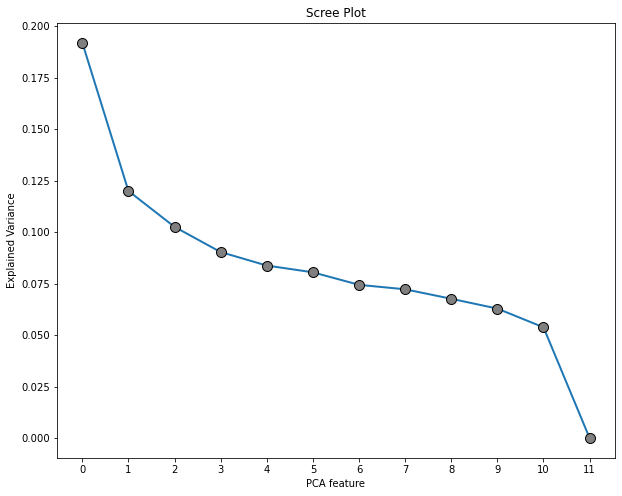

In [25]:
# calling the scree_plot function
scree_plot(pca_object = pca,
           export     = False)

In [26]:
# # setting plot size
# fig, ax = plt.subplots(figsize = (12, 12))


# # developing a PC to feature heatmap
# sns.heatmap(pca.components_, 
#             cmap = 'coolwarm',
#             square = True,
#             annot = True,
#             linewidths = 0.1,
#             linecolor = 'black')


# # setting more plot options
# plt.yticks([0, 1, 2, 3, 4, 5,6,7,8,9,10,11],
#            ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6","PC 7","PC 8","PC 9","PC 10","PC 11","PC 12"])

# plt.xticks(range(0, 12),
#            pychometric_technology_df.columns,
#            rotation=60,
#            ha='left')

# plt.xlabel(xlabel = "Feature")
# plt.ylabel(ylabel = "Principal Component")


# # displaying the plot
# plt.show()

In [27]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(pychometric_technology_df_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
#factor_loadings_df.to_excel('pyschometric_technology_df_1.xlsx')

                                            0     1     2     3     4     5     6     7     8     9     10    11
keep_up_with_technology                  -0.29  0.00 -0.30 -0.52  0.09  0.42  0.26 -0.40  0.06  0.13  0.08 -0.34
ask_me_advice_technology                  0.13  0.50  0.30 -0.21 -0.05 -0.08 -0.19 -0.10  0.62 -0.29 -0.14 -0.23
enjoy_purchasing_technology               0.08  0.57 -0.20 -0.12 -0.20 -0.44  0.12  0.09 -0.46  0.15  0.14 -0.32
too_much_technology                      -0.45 -0.22  0.23  0.03  0.02 -0.15 -0.09  0.29  0.11 -0.15  0.65 -0.36
enjoy_control_technology                  0.01  0.09 -0.66  0.53  0.08  0.12 -0.24  0.11  0.29  0.05 -0.02 -0.32
save_time_use_apps                        0.10  0.23  0.44  0.45 -0.21  0.57  0.07 -0.17 -0.24  0.08  0.10 -0.26
music_important_in_life                   0.24 -0.07  0.13  0.24  0.68 -0.27  0.46 -0.23  0.02 -0.08  0.02 -0.24
learn_tv_shows                            0.31 -0.03  0.02 -0.31  0.42  0.30 -0.41  0.38 -0.35 -

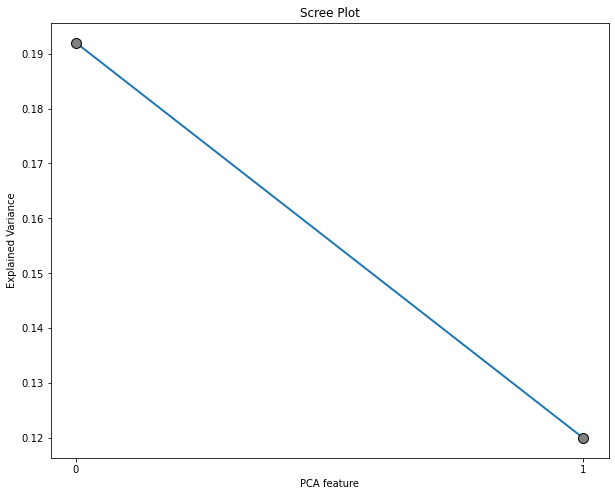

In [28]:
# INSTANTIATING a new model using the first three principal components
pca_1 = PCA(n_components = 2,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
technology_pca_1 = pca_1.fit_transform(pychometric_technology_df_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_1,
           export     = False)

In [29]:
# transposing pca components (pc = 2)
factor_loadings_1 = pd.DataFrame(np.transpose(pca_1.components_))


# naming rows as original features
factor_loadings_1 = factor_loadings_1.set_index(pychometric_technology_df_scaled.columns)

print(factor_loadings_1)

                                                 0         1
keep_up_with_technology                  -0.293224  0.000119
ask_me_advice_technology                  0.131389  0.501761
enjoy_purchasing_technology               0.081735  0.571408
too_much_technology                      -0.449422 -0.216258
enjoy_control_technology                  0.010062  0.088365
save_time_use_apps                        0.101491  0.226768
music_important_in_life                   0.242936 -0.068005
learn_tv_shows                            0.305967 -0.031319
too_much_info_online                     -0.484307 -0.134601
checking_friends_facebook                 0.297435 -0.240089
internet_easier_for_family                0.260027 -0.408836
internet_easy_for_avoidin_family_friends  0.366642 -0.259261


In [30]:
# naming each principal component
factor_loadings_1.columns = ['Normal Users',   
                             'Savvy Technologists'] 


# checking the result
factor_loadings_1.round(decimals = 2)

,Normal Users,Savvy Technologists
keep_up_with_technology,-0.29,0.00
ask_me_advice_technology,0.13,0.50
enjoy_purchasing_technology,0.08,0.57
too_much_technology,-0.45,-0.22
enjoy_control_technology,0.01,0.09
save_time_use_apps,0.10,0.23
music_important_in_life,0.24,-0.07
learn_tv_shows,0.31,-0.03
too_much_info_online,-0.48,-0.13
checking_friends_facebook,0.30,-0.24


In [31]:
# analyzing factor strengths per customer
factor_loadings = pca_1.transform(pychometric_technology_df_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_1.columns


# checking the results
factor_loadings_df.head(n=5)

,Normal Users,Savvy Technologists
0,-0.883397,0.304723
1,2.907642,-0.029114
2,1.186273,-1.398056
3,1.836203,-2.601162
4,0.849763,2.790191


In [32]:
#factor_loadings_df.to_excel('./PCA Factor Loadings.xlsx',
                            #index = False)

In [33]:
#Analyzing the factor loadings for the above Principal components
len(factor_loadings_df['Normal Users'][factor_loadings_df['Normal Users']  > 1])

435

This means that 28% of the Normal Users have a standard deviation above 1 and have good correlations regarding the use of social media applications so the marketing team would target them with social media apps

In [34]:
len(factor_loadings_df['Normal Users'][factor_loadings_df['Normal Users'] < -1])

529

This means that 34% of the normal users have a std deviation less than -1 and this % are less likely to keep up with technology and they are not much open to new technological features.This % wants easy straightforward applications that regard to music and to tv shows and social media.

In [35]:
len(factor_loadings_df['Savvy Technologists'][factor_loadings_df['Savvy Technologists'] > 1])

276

This number shows us that there is 18% who are derived to be as technology lovers and enjoy purchasing technology
This % like to use applications to save their time and they are open to new applications for the marketing team 
to target them with new applications in the market because they are more likely open to try new apps

In [36]:
len(factor_loadings_df['Savvy Technologists'][factor_loadings_df['Savvy Technologists'] < -1])

302

In [37]:
#This is the info for the second psychometric grouped data which is the question about personality
psychometric_info_2 = ['opinion_leader','stand_out_from_others','offers_advice','lead_decision_making',
                       'first_to_try_new_things','responsibility_overrated','like_being_in_control','risk_taker',
                       'creative','optimistic','very_active','stretched_for_time']

pyschometric_personality = team_df.loc[ : , ['opinion_leader','stand_out_from_others','offers_advice','lead_decision_making',
                       'first_to_try_new_things','responsibility_overrated','like_being_in_control','risk_taker',
                       'creative','optimistic','very_active','stretched_for_time']]

pyschometric_personality_transposed = pyschometric_personality.transpose()
pyschometric_personality_transposed.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551
opinion_leader,5,1,3,2,3,1,2,1,3,2,3,1,4,4,1,2,2,3,2,2,1,3,3,1,2,3,2,4,2,1,3,4,1,2,3,1,2,2,4,2,1,3,2,3,1,2,2,1,3,3,3,3,2,3,2,1,2,2,1,3,3,1,3,3,1,4,3,3,2,1,4,2,1,1,1,1,4,3,4,3,4,1,1,3,2,1,1,2,2,4,3,2,1,3,6,3,6,1,2,2,3,5,1,2,5,2,3,2,3,4,2,2,5,2,2,2,2,2,2,3,2,1,3,2,2,1,3,2,3,5,3,3,1,3,1,3,3,2,3,2,1,1,2,2,2,3,1,2,1,4,2,1,2,2,1,2,2,3,1,1,2,4,3,4,3,3,2,1,1,3,2,3,3,2,2,2,6,2,4,1,2,1,3,1,2,4,4,3,2,4,3,3,1,4,2,4,1,1,2,2,2,3,1,2,3,2,2,2,3,3,3,2,2,1,3,2,4,1,1,4,4,3,3,1,2,2,4,2,1,2,2,3,2,1,2,1,2,1,3,3,3,1,5,1,3,2,1,2,2,2,...,1,2,5,4,1,1,3,1,4,3,4,3,2,4,1,2,3,2,2,3,2,3,3,3,3,3,2,2,3,4,5,3,1,2,3,2,3,2,3,4,6,1,4,1,2,2,2,1,3,2,3,3,2,1,2,1,3,2,1,1,3,1,2,3,2,1,2,1,3,1,2,1,2,5,2,4,2,2,1,2,2,2,1,3,3,3,4,4,2,1,1,1,2,1,5,1,2,3,4,2,1,3,3,1,2,1,1,3,3,2,2,4,1,1,3,3,3,1,1,1,2,3,2,4,2,2,2,3,1,2,4,1,3,1,1,1,3,1,2,4,1,2,1,2,2,3,2,2,1,2,2,4,2,2,3,2,1,1,1,4,1,2,3,1,1,1,1,3,4,2,1,3,2,2,3,2,2,2,2,4,3,3,4,2,3,2,2,3,5,2,3,4,2,4,3,2,1,1,1,2,2,2,3,4,3,4,2,3,2,3,3,3,1,3,2,1,2,3,3,2,1,2,2,4,2,1,1,1,1,2,1,1,3,3,5,3,2,2,3,2,2,1,4,2,5,1,2,1,2,5
stand_out_from_others,5,2,5,2,2,2,2,1,3,2,2,3,4,1,3,3,2,2,2,4,3,5,3,4,2,3,4,3,5,3,2,3,1,2,5,1,2,2,4,2,3,3,1,2,2,4,3,1,4,3,2,4,4,3,2,1,2,1,4,3,3,2,5,3,1,2,2,3,2,2,1,1,1,1,1,1,4,1,4,3,4,2,1,3,3,3,1,2,2,4,3,1,1,2,5,2,6,1,1,1,2,4,6,2,3,1,3,2,6,3,3,2,5,1,3,2,6,1,1,4,2,1,3,2,2,2,1,2,5,5,3,4,2,2,1,1,5,2,3,4,2,3,2,2,3,3,1,3,3,3,2,3,2,2,3,4,2,3,2,1,1,4,4,3,3,2,2,1,1,4,2,6,3,2,3,1,6,1,3,3,1,6,3,2,3,1,3,6,1,4,4,3,1,5,2,5,2,1,5,3,4,2,1,2,3,3,2,2,4,2,2,2,4,1,3,1,1,4,6,3,4,2,3,2,2,2,2,3,1,2,2,3,3,1,4,1,2,1,3,4,3,1,2,1,3,3,1,1,2,1,...,1,2,6,1,1,2,1,1,3,1,4,1,2,3,1,3,1,3,2,3,3,3,3,3,3,2,4,2,1,6,4,3,1,3,4,2,2,3,4,3,4,1,3,1,3,1,3,1,5,1,2,3,4,2,3,1,2,2,2,1,3,3,2,2,2,5,1,1,4,1,2,1,1,3,2,3,2,2,2,3,2,2,3,3,3,2,4,3,2,1,1,2,3,1,3,1,3,4,3,2,1,3,3,2,2,1,1,1,3,1,1,4,1,1,5,2,1,2,1,3,2,1,4,4,1,2,2,3,1,2,4,1,3,1,2,5,3,1,1,3,1,2,1,2,2,2,2,2,1,2,3,4,3,2,3,

In [38]:
#Transposing the dataframe to scale the rows and then columns
pyschometric_personality_transposed_scaled = unsupervised_scaler(df = pyschometric_personality_transposed)

pyschometric_personality_transposed_scaled.head(n=3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551
0,0.894427,-1.183216,-0.928477,0.301511,0.894427,-0.868243,-0.422116,-0.57735,-0.436852,-0.57735,0.611593,-0.662226,0.562254,1.432078,-1.042572,-0.654654,-0.175863,-0.096674,-0.157459,-1.426935,-0.768350,-0.389490,0.0,-0.830504,-0.118678,-0.156174,-1.063410,0.742307,-1.183216,-1.420127,1.131371,0.229416,-0.447214,-0.331862,0.000000,0.0,-0.301511,-0.447214,0.509019,-0.611593,-0.644503,0.301511,0.156174,0.911322,-1.0,-0.866025,-0.686803,0.0,0.229416,-0.389490,1.0,0.242536,-1.025139,0.676716,-0.565685,-0.301511,-0.447214,-0.447214,-1.613603,-0.534522,-0.447214,-1.207407,-0.420084,0.145865,-0.762770,1.732051,0.39736,0.301511,0.109764,-1.162476,0.550791,-0.397360,-0.76835,-0.534522,-0.483368,-0.447214,0.447214,0.654654,0.208514,0.130189,1.063410,-1.257887,-0.611593,0.0,-0.644503,-1.526564,0.0,-0.169031,-0.066372,0.866025,0.0,-0.92582,-0.447214,0.845154,1.294551,1.069045,0.301511,-0.527589,-0.080322,-0.242536,0.447214,1.732051,-1.732051,-0.324443,2.223494,0.063119,-0.080322,0.0,-0.650945,1.207407,-0.377964,-0.523205,1.183216,0.523205,-0.57735,-0.507093,-1.078328,-0.063119,-0.464991,-0.845154,-0.373718,-1.057188,0.0,-0.124035,-0.447214,-1.459601,2.672612,-0.694314,0.074744,0.955994,0.0,-0.534522,-0.694314,-0.057831,-0.527589,0.331862,-1.352504,-0.447214,1.093216,-0.636146,-1.0,-0.783929,-0.894427,-0.289157,-0.784465,-0.447214,-0.534522,-0.523205,-0.663325,1.414214,-0.707107,-1.459601,-0.772049,-0.676716,-1.333772,-0.739895,0.0,-0.156174,-0.523205,-0.762493,0.242536,0.76835,-0.548821,1.206045,0.0,0.845154,0.0,0.0,-0.845154,-0.353553,0.0,-0.392232,0.768350,-0.420084,-0.512989,1.069045,0.0,-0.264135,1.256757,-1.083473,-0.324443,-1.224745,0.447214,-1.0,0.000000,0.529999,0.301511,0.066372,0.768350,0.074744,0.074744,0.169031,-1.147079,0.251577,-0.301511,0.822179,-0.707107,-0.447214,-0.820553,-0.971666,-0.741999,0.780869,-0.697877,-0.729

In [39]:
#Transposing back
pychometric_personality_df = pyschometric_personality_transposed_scaled.transpose()
pychometric_personality_df.columns = psychometric_info_2
pychometric_personality_df.head(n=5)

,opinion_leader,stand_out_from_others,offers_advice,lead_decision_making,first_to_try_new_things,responsibility_overrated,like_being_in_control,risk_taker,creative,optimistic,very_active,stretched_for_time
0,0.894427,0.894427,-0.447214,0.894427,-0.447214,0.894427,-0.447214,0.894427,-1.788854,-1.788854,-0.447214,0.894427
1,-1.183216,0.845154,-1.183216,0.845154,0.845154,-1.183216,0.845154,-1.183216,0.845154,0.845154,0.845154,-1.183216
2,-0.928477,1.299867,0.185695,-2.042649,1.299867,1.299867,0.185695,0.185695,0.185695,-0.928477,-0.928477,0.185695
3,0.301511,0.301511,0.301511,0.301511,-1.507557,0.301511,-1.507557,2.110579,0.301511,0.301511,0.301511,-1.507557
4,0.894427,-0.447214,0.894427,0.894427,0.894427,0.894427,0.894427,-0.447214,-0.447214,-0.447214,-1.788854,-1.788854


In [40]:
# applying the unsupervised_scaler function
pychometric_personality_df_scaled = unsupervised_scaler(df = pychometric_personality_df)


# checking pre- and post-scaling variance
print(np.var(pychometric_personality_df), '\n\n')
print(np.var(pychometric_personality_df_scaled))

opinion_leader              0.507067
stand_out_from_others       0.568591
offers_advice               0.535552
lead_decision_making        0.512149
first_to_try_new_things     0.599577
responsibility_overrated    1.522632
like_being_in_control       0.572625
risk_taker                  0.702991
creative                    0.609025
optimistic                  0.713728
very_active                 0.613174
stretched_for_time          0.964209
dtype: float64 


opinion_leader              1.0
stand_out_from_others       1.0
offers_advice               1.0
lead_decision_making        1.0
first_to_try_new_things     1.0
responsibility_overrated    1.0
like_being_in_control       1.0
risk_taker                  1.0
creative                    1.0
optimistic                  1.0
very_active                 1.0
stretched_for_time          1.0
dtype: float64


In [41]:
# # setting plot size
# fig, ax = plt.subplots(figsize = (8, 8))


# # developing a correlation matrix object
# df_corr = pychometric_personality_df_scaled.corr().round(2)


# # creating a correlation heatmap
# sns.heatmap(data =df_corr,
#             cmap = 'Blues',
#             square = True,
#             annot = True)


# # rendering the heatmap
# plt.show()

In [42]:
# INSTANTIATING a PCA object with no limit to principal components
pca_personality = PCA(n_components = None,
                  random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_personality_pca = pca_personality.fit_transform(pychometric_personality_df_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", pychometric_personality_df_scaled.shape)
print("PCA shape     :", psychometric_personality_pca.shape)

Original shape: (1552, 12)
PCA shape     : (1552, 12)


In [43]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca_personality.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.129
PC 2: 0.113
PC 3: 0.108
PC 4: 0.103
PC 5: 0.091
PC 6: 0.084
PC 7: 0.08
PC 8: 0.079
PC 9: 0.077
PC 10: 0.07
PC 11: 0.065
PC 12: 0.0


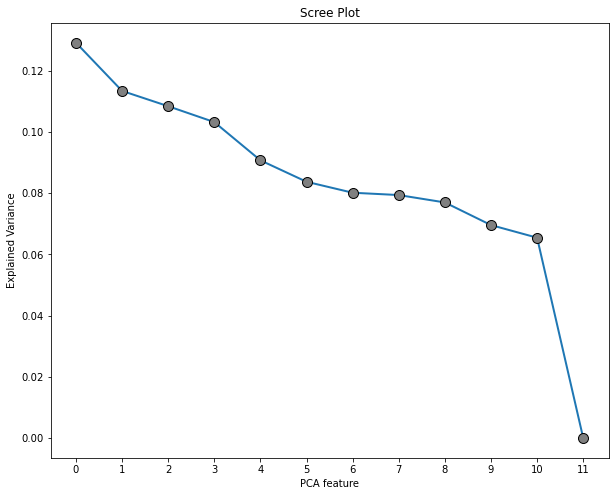

In [44]:
# calling the scree_plot function
scree_plot(pca_object = pca_personality,
           export     = False)

We Chose four principal components that represent the personality components because the first two components
only represented around 23% of the variance

In [45]:
# transposing pca components
factor_loadings_df_2 = pd.DataFrame(np.transpose(pca_personality.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df_2 = factor_loadings_df_2.set_index(pychometric_personality_df_scaled.columns)


# checking the result
print(factor_loadings_df_2)


# saving to Excel
#factor_loadings_df_2.to_excel('pyschometric_personality_df2.xlsx')

                            0     1     2     3     4     5     6     7     8     9     10    11
opinion_leader            0.35 -0.21 -0.16 -0.01  0.16  0.58 -0.46 -0.06  0.24  0.06  0.33 -0.25
stand_out_from_others     0.10 -0.36  0.17 -0.22  0.48 -0.36 -0.11 -0.40 -0.38 -0.20  0.03 -0.26
offers_advice             0.14 -0.00  0.21 -0.48 -0.36  0.31  0.15  0.35 -0.52 -0.08  0.04 -0.25
lead_decision_making      0.46  0.05 -0.36  0.03  0.04 -0.09  0.18  0.18  0.20 -0.53 -0.44 -0.25
first_to_try_new_things   0.10 -0.38  0.26  0.22 -0.30  0.12  0.58 -0.38  0.25  0.09  0.06 -0.27
responsibility_overrated -0.62 -0.16 -0.03 -0.00 -0.26  0.10 -0.36 -0.09  0.09 -0.16 -0.40 -0.43
like_being_in_control     0.17  0.09 -0.46 -0.33 -0.31 -0.39 -0.07 -0.19  0.05  0.53  0.02 -0.26
risk_taker                0.09 -0.31  0.05  0.54 -0.03 -0.31 -0.14  0.56 -0.16  0.21  0.10 -0.29
creative                  0.02  0.19  0.49 -0.29  0.37 -0.05  0.05  0.26  0.45  0.31 -0.23 -0.27
optimistic                0.08

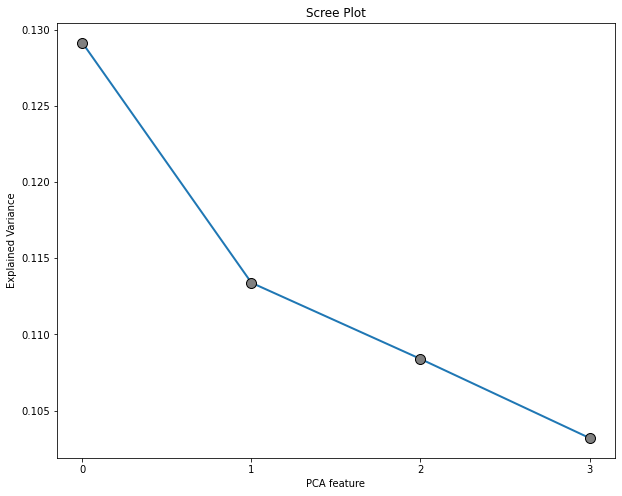

In [46]:
# INSTANTIATING a new model using the first three principal components
pca_2 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
personality_pca_1 = pca_2.fit_transform(pychometric_personality_df_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_2,
           export     = False)

In [47]:
# transposing pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(np.transpose(pca_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(pychometric_personality_df_scaled.columns)

print(factor_loadings_2)

                                 0         1         2         3
opinion_leader            0.353706 -0.210934 -0.161336 -0.014089
stand_out_from_others     0.102546 -0.357264  0.174643 -0.217486
offers_advice             0.144418 -0.004866  0.213386 -0.480714
lead_decision_making      0.456154  0.054732 -0.363863  0.028070
first_to_try_new_things   0.104104 -0.380520  0.257286  0.219102
responsibility_overrated -0.618242 -0.158759 -0.032947 -0.003577
like_being_in_control     0.170966  0.088608 -0.458229 -0.331887
risk_taker                0.086333 -0.310679  0.052506  0.544104
creative                  0.017087  0.188005  0.492180 -0.293307
optimistic                0.082777  0.538930  0.301411  0.141764
very_active               0.083840  0.461981 -0.031988  0.394902
stretched_for_time       -0.437637  0.106113 -0.389122 -0.065853


In [48]:
# naming each principal component
factor_loadings_2.columns = ['Leaders',   
                             'Reserved',
                             'Artistic',
                             'Experimental'] 


# checking the result
factor_loadings_2.round(decimals = 2)

,Leaders,Reserved,Artistic,Experimental
opinion_leader,0.35,-0.21,-0.16,-0.01
stand_out_from_others,0.10,-0.36,0.17,-0.22
offers_advice,0.14,-0.00,0.21,-0.48
lead_decision_making,0.46,0.05,-0.36,0.03
first_to_try_new_things,0.10,-0.38,0.26,0.22
responsibility_overrated,-0.62,-0.16,-0.03,-0.00
like_being_in_control,0.17,0.09,-0.46,-0.33
risk_taker,0.09,-0.31,0.05,0.54
creative,0.02,0.19,0.49,-0.29
optimistic,0.08,0.54,0.30,0.14


In [49]:
factor_loadings_2.head(n=5)

,Leaders,Reserved,Artistic,Experimental
opinion_leader,0.353706,-0.210934,-0.161336,-0.014089
stand_out_from_others,0.102546,-0.357264,0.174643,-0.217486
offers_advice,0.144418,-0.004866,0.213386,-0.480714
lead_decision_making,0.456154,0.054732,-0.363863,0.028070
first_to_try_new_things,0.104104,-0.380520,0.257286,0.219102


In [50]:
# analyzing factor strengths per customer
factor_loadings2 = pca_2.transform(pychometric_personality_df_scaled)


# converting to a DataFrame
factor_loadings_df_2 = pd.DataFrame(factor_loadings2)


# renaming columns
factor_loadings_df_2.columns = factor_loadings_2.columns


# checking the results
factor_loadings_df_2.head(n=5)

,Leaders,Reserved,Artistic,Experimental
0,1.071016,-2.153167,-2.341512,0.388846
1,2.528526,1.892913,0.871926,-0.374567
2,-1.032870,-1.944093,1.838096,-1.260228
3,1.907153,0.294855,1.542432,1.116260
4,2.711757,-1.433937,-0.268760,-1.960698


26% of users have standard deviation above 1 and these are more likely to be leaders


In [51]:
#Analyzing the factor loadings for the above Principal components
len(factor_loadings_df_2['Leaders'][factor_loadings_df_2['Leaders']  > 1])

396

In [52]:
len(factor_loadings_df_2['Leaders'][factor_loadings_df_2['Leaders']  < -1])


363

17% are more likely to be reserved and should be tackled in a specific way with the marketing department

In [53]:
len(factor_loadings_df_2['Reserved'][factor_loadings_df_2['Reserved']  > 1])

258

In [54]:
len(factor_loadings_df_2['Reserved'][factor_loadings_df_2['Reserved']  < - 1])

305

18% are more likely to be artistic 

In [55]:
len(factor_loadings_df_2['Artistic'][factor_loadings_df_2['Artistic']  > 1])
#18% are more likely to be artistic and they have specific targets with marketing the applications

278

In [56]:
len(factor_loadings_df_2['Artistic'][factor_loadings_df_2['Artistic']  < -1])

290

Around 19.5 % of the persons are more likely to be experimental

In [57]:
len(factor_loadings_df_2['Experimental'][factor_loadings_df_2['Experimental']  > 1])

302

In [58]:
len(factor_loadings_df_2['Experimental'][factor_loadings_df_2['Experimental']  < -1])

268

In [59]:
#This is the info tor the third pyschometric grouped data which describes the consumer_behavior
psychometric_info_3 = ['look_for_deals','enjoy_shopping','like_package_deals','always_shopping_online','attracted_luxury_brands',
                       'prefer_designer_brands','cant_get_enough_apps','how_much_apps_are_cool_matters','love_showing_new_apps',
                       'children_impact_apps','worth_spending_on_apps','agree_on_always_spending_money_i_earn','%_free_apps',
                       'influenced_by_what_is_hot','buy_brands_style','make_impulse_purchases',
                       'mobile_phone_source_entertainment']

In [60]:
#Transposing to scale the rows
psychometric_purchase = team_df.loc[ : , ['look_for_deals','enjoy_shopping','like_package_deals','always_shopping_online','attracted_luxury_brands',
                       'prefer_designer_brands','cant_get_enough_apps','how_much_apps_are_cool_matters','love_showing_new_apps',
                       'children_impact_apps','worth_spending_on_apps','agree_on_always_spending_money_i_earn','%_free_apps',
                       'influenced_by_what_is_hot','buy_brands_style','make_impulse_purchases',
                       'mobile_phone_source_entertainment'] ]

psychometric_purchase_transposed = psychometric_purchase.transpose()
psychometric_purchase_transposed.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551
look_for_deals,5,2,6,3,2,1,2,2,3,2,5,1,2,5,3,2,5,5,3,3,3,5,3,1,1,4,3,3,5,4,1,3,4,4,2,1,3,2,2,4,2,4,3,2,2,5,3,1,6,5,3,6,4,2,4,1,3,4,2,4,3,4,3,4,2,1,2,3,3,5,4,3,3,1,1,1,3,1,3,3,3,4,1,3,3,3,1,2,3,4,2,3,1,3,3,3,4,3,2,1,6,4,1,3,6,6,4,2,5,3,1,2,5,2,3,2,6,2,3,4,1,6,3,1,3,3,2,2,5,5,3,3,3,6,3,6,5,3,3,3,2,2,3,4,2,4,2,1,5,3,2,3,3,2,3,3,2,4,1,1,2,5,4,3,3,2,5,1,2,3,2,6,5,3,6,1,6,1,5,4,6,3,4,2,4,4,3,1,4,6,4,1,2,5,1,5,1,1,3,5,2,3,3,6,3,2,2,5,5,5,2,3,2,1,3,3,6,2,1,2,4,3,3,2,5,4,1,4,3,2,2,3,3,2,2,1,2,1,4,2,2,3,6,3,3,2,2,4,2,5,...,1,3,5,2,1,3,3,6,5,3,4,1,3,4,1,6,1,4,5,2,6,3,4,3,3,3,5,2,6,6,3,3,1,4,4,1,3,6,3,5,5,4,4,3,6,3,3,2,3,2,1,2,2,1,2,1,4,1,4,1,1,1,5,1,3,3,1,2,3,1,4,1,2,3,2,3,2,1,1,2,2,1,6,4,1,1,4,2,2,1,1,1,2,1,6,2,2,3,4,2,1,3,3,1,1,1,1,3,4,2,2,6,2,2,4,4,3,1,1,1,2,2,6,3,2,2,2,2,1,1,4,6,4,2,4,6,5,1,5,1,1,2,2,1,2,6,3,2,3,3,1,4,3,2,3,2,6,1,3,5,1,3,3,2,1,1,1,4,1,2,1,4,4,6,3,3,2,3,2,4,5,3,1,2,2,6,3,1,3,1,1,5,2,3,3,3,1,1,1,2,2,1,3,4,3,6,1,4,3,2,1,2,1,5,2,4,3,2,3,2,1,2,2,4,5,2,1,4,2,1,1,3,3,3,5,5,2,4,3,2,2,1,2,2,5,1,2,2,3,3
enjoy_shopping,2,2,1,1,2,5,1,1,3,2,4,3,1,1,3,2,2,2,1,1,1,2,4,1,1,1,1,2,2,2,1,4,3,3,1,1,3,2,1,2,2,1,1,2,2,2,2,1,2,4,4,1,3,2,3,1,3,2,1,3,3,2,3,1,3,2,1,3,3,4,4,2,1,1,1,1,3,1,3,3,1,6,1,3,1,5,1,2,1,2,2,2,1,1,2,1,3,1,1,2,3,3,6,2,2,1,3,2,2,3,1,2,1,2,2,2,1,1,1,3,3,1,2,1,2,2,2,2,3,1,3,4,2,3,4,1,2,4,1,2,2,1,1,1,2,4,2,2,1,1,1,2,3,1,1,4,2,1,1,3,2,2,2,1,3,3,3,1,2,3,2,4,5,3,1,1,6,2,4,1,1,2,2,1,4,3,5,2,4,2,3,2,1,5,1,3,2,2,2,2,2,3,2,1,1,2,2,2,2,2,1,1,1,1,4,2,3,4,2,1,3,2,4,2,1,1,2,1,1,1,2,4,3,1,2,4,2,1,2,2,1,3,2,1,3,4,4,1,1,1,...,2,1,2,2,1,2,2,2,3,4,2,1,2,1,1,1,2,2,2,2,2,3,3,3,2,2,1,2,3,1,1,3,1,2,2,2,3,1,1,3,3,2,2,1,2,1,2,1,1,2,2,2,1,1,3,1,3,2,3,1,3,1,1,1,1,2,1,1,4,2,4,1,1,3,3,3,3,1,3,3,2,4,1,2,3,2,3,2,2,1,1,1,2,3,2,5,1,3,3,2,2,1,4,2,1,2,1,2,3,3,2,3,2,3,3,1,2,2,5,2,2,1,2,1,2,3,2,2,3,1,3,6,3,2,2,1,2,1,2,1,1,2,1,2,2,3,3,2,3,3,1,3,1,1,2,2,1,1,3

In [61]:
psychometric_purchase_transposed_scaled = unsupervised_scaler( df = psychometric_purchase_transposed )
psychometric_purchase_transposed_scaled.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551
0,1.060660,0.202031,1.340525,1.047570,-0.762493,-2.149434,-0.122169,-0.686406,-0.186501,-0.907855,0.878750,-1.039884,-1.266256,0.696574,-0.514259,-0.818317,0.955899,0.980581,0.656599,-0.716302,-1.060660,0.950255,-0.606478,-0.696733,-1.265262,0.352865,-0.179969,-0.511166,1.192494,1.160610,-0.662754,-0.328196,2.294157,0.722222,-0.707107,-0.25,-0.322329,-0.638470,-0.895167,0.360997,-0.435561,0.517932,0.058926,-0.25,0.322329,0.746278,-0.746278,-0.25,1.110665,0.883310,-1.166667,1.684543,0.645497,-0.784837,0.250000,-0.25,0.0,0.584898,-0.638470,0.686406,-0.15523,0.659966,-0.411476,0.475085,-0.431331,-0.810191,-1.056034,-0.25,-0.942809,0.808608,0.518321,-0.211407,-0.205704,-0.25,-0.545921,-0.623783,-0.540738,-0.746278,-0.863153,-0.231125,-0.250,0.154598,-0.426162,-0.25,0.291730,-0.576018,-0.25,-0.59588,-0.254257,0.297775,0.0,0.250000,-0.410792,-0.041030,-0.034669,0.394132,0.305888,2.298393,-0.569803,-1.442986,1.515229,0.250,-1.060660,-0.569803,1.231662,1.399826,0.848668,-0.25,1.149958,-0.25,-1.146811,-0.716039,0.433461,-1.036535,0.980581,-0.344124,1.110255,-0.153493,-0.696733,0.155230,-1.343503,1.069981,0.738549,-1.335654,2.160247,0.541736,-0.25,-1.166667,0.921954,0.330540,-0.365148,-0.686406,0.595880,1.474686,0.722222,0.955899,0.598321,-0.682288,0.457389,-0.836660,0.081111,-1.457738,-0.481543,0.907855,-0.891645,-0.141421,0.174078,-0.762493,0.697633,0.086066,-0.716302,0.961524,-0.595880,-0.907855,-0.268462,-0.066154,-0.392837,0.669439,-0.851257,-1.231136,-0.223161,0.636364,-0.048564,0.130744,-0.25,-0.777029,1.333435,-0.25,0.462910,0.058926,-0.25,1.037521,0.25,0.000000,1.181864,-0.344124,0.25,-1.576221,1.160610,1.617215,1.531582,-0.592187,0.451848,0.738549,0.762493,0.191273,-0.488046,-1.387409,0.357143,1.238852,0.250000,-2.043016,0.365148,0.964286,-0.624038,0.847998,-0.762493,-1.459993,-0.457389,1.367527,-0.919007,0.311086,0.382920,

In [62]:
#Tranposing back to scale the columns
pychometric_purchase_df = psychometric_purchase_transposed_scaled.transpose()
pychometric_purchase_df.columns = psychometric_info_3
pychometric_purchase_df.head(n=5)

,look_for_deals,enjoy_shopping,like_package_deals,always_shopping_online,attracted_luxury_brands,prefer_designer_brands,cant_get_enough_apps,how_much_apps_are_cool_matters,love_showing_new_apps,children_impact_apps,worth_spending_on_apps,agree_on_always_spending_money_i_earn,%_free_apps,influenced_by_what_is_hot,buy_brands_style,make_impulse_purchases,mobile_phone_source_entertainment
0,1.060660,-1.515229,-0.656599,-0.656599,-0.656599,1.060660,1.060660,-0.656599,0.202031,1.919290,0.202031,0.202031,-2.373858,0.202031,0.202031,0.202031,0.202031
1,0.202031,0.202031,0.202031,0.202031,-1.515229,-1.515229,1.919290,0.202031,0.202031,-1.515229,-1.515229,0.202031,1.919290,0.202031,0.202031,0.202031,0.202031
2,1.340525,-2.588601,-0.231125,-1.016950,0.554700,1.340525,0.554700,0.554700,0.554700,-1.016950,0.554700,0.554700,0.554700,-0.231125,0.554700,-1.016950,-1.016950
3,1.047570,-1.692228,-1.692228,-0.322329,-0.322329,2.417469,1.047570,-0.322329,-0.322329,-0.322329,1.047570,-0.322329,-0.322329,1.047570,-0.322329,-0.322329,-0.322329
4,-0.762493,-0.762493,-2.058731,1.829983,0.533745,0.533745,0.533745,-0.762493,0.533745,0.533745,0.533745,0.533745,0.533745,0.533745,-0.762493,0.533745,-2.058731


In [63]:
# applying the unsupervised_scaler function
pychometric_purchase_df_scaled = unsupervised_scaler(df = pychometric_purchase_df)


# checking pre- and post-scaling variance
print(np.var(pychometric_purchase_df), '\n\n')
print(np.var(pychometric_purchase_df_scaled))

look_for_deals                           0.744455
enjoy_shopping                           0.807848
like_package_deals                       0.652182
always_shopping_online                   0.695376
attracted_luxury_brands                  0.779184
prefer_designer_brands                   0.702617
cant_get_enough_apps                     0.726397
how_much_apps_are_cool_matters           0.782812
love_showing_new_apps                    0.639236
children_impact_apps                     1.434638
worth_spending_on_apps                   0.695452
agree_on_always_spending_money_i_earn    0.967362
%_free_apps                              1.897200
influenced_by_what_is_hot                0.612018
buy_brands_style                         0.550014
make_impulse_purchases                   0.801874
mobile_phone_source_entertainment        0.675779
dtype: float64 


look_for_deals                           1.0
enjoy_shopping                           1.0
like_package_deals                       1

In [64]:
# INSTANTIATING a PCA object with no limit to principal components
pca_purchase = PCA(n_components = None,
                   random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_purchase_pca = pca_purchase.fit_transform(pychometric_purchase_df_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", pychometric_purchase_df_scaled.shape)
print("PCA shape     :", psychometric_purchase_pca.shape)

Original shape: (1552, 17)
PCA shape     : (1552, 17)


In [65]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca_purchase.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.107
PC 2: 0.089
PC 3: 0.087
PC 4: 0.079
PC 5: 0.069
PC 6: 0.065
PC 7: 0.059
PC 8: 0.058
PC 9: 0.056
PC 10: 0.054
PC 11: 0.053
PC 12: 0.05
PC 13: 0.05
PC 14: 0.045
PC 15: 0.042
PC 16: 0.036
PC 17: 0.0


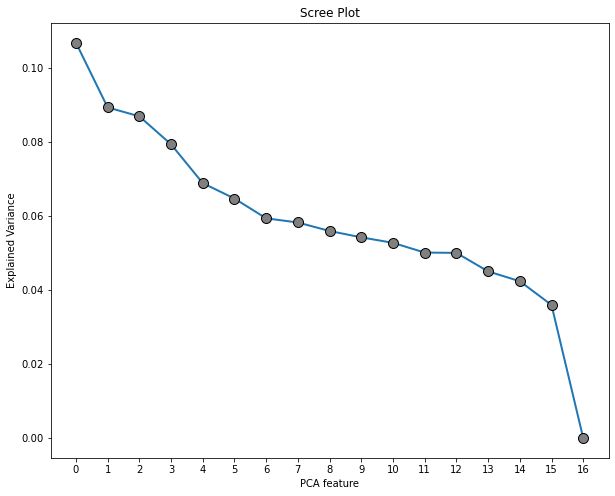

In [66]:
# calling the scree_plot function
scree_plot(pca_object = pca_purchase,
           export     = False)

In [67]:
# transposing pca components
factor_loadings_df_3 = pd.DataFrame(np.transpose(pca_purchase.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df_3 = factor_loadings_df_3.set_index(pychometric_purchase_df_scaled.columns)


# checking the result
print(factor_loadings_df_3)


# saving to Excel
#factor_loadings_df_3.to_excel('pyschometric_pruchase_df.xlsx')

                                         0     1     2     3     4     5     6     7     8     9     10    11    12    13    14    15    16
look_for_deals                         0.51 -0.12 -0.17  0.02  0.01 -0.06  0.16 -0.21 -0.14 -0.27  0.00  0.11  0.13 -0.10  0.11 -0.65  0.23
enjoy_shopping                        -0.24  0.46 -0.19  0.12 -0.06  0.04  0.01  0.06 -0.19 -0.21  0.06  0.44 -0.12  0.06  0.55  0.11  0.24
like_package_deals                     0.21  0.25  0.19  0.01  0.23  0.43 -0.20 -0.03 -0.05  0.39 -0.16  0.12  0.57  0.10  0.02  0.04  0.21
always_shopping_online                -0.17  0.24  0.17  0.20 -0.26 -0.04  0.10 -0.62 -0.33  0.19 -0.20 -0.23 -0.22  0.03 -0.20 -0.05  0.22
attracted_luxury_brands               -0.04  0.23  0.08 -0.30  0.06  0.51  0.41 -0.08  0.42 -0.12  0.24 -0.05 -0.24 -0.13 -0.17 -0.05  0.23
prefer_designer_brands                 0.52 -0.17 -0.17  0.03 -0.11  0.03  0.06 -0.16 -0.11 -0.18  0.07  0.09 -0.05  0.00 -0.12  0.71  0.22
cant_get_enough_apps

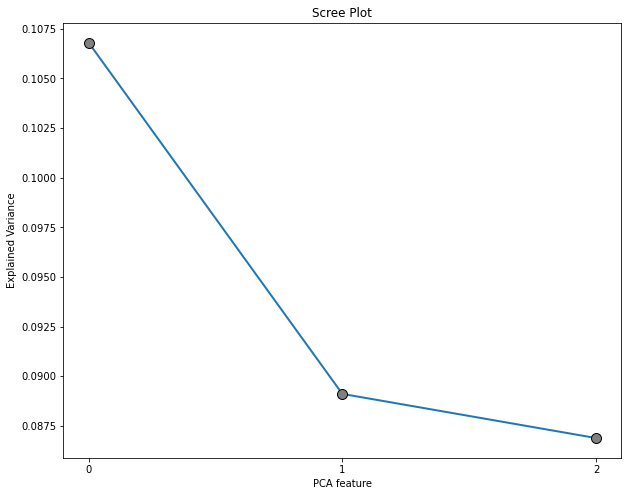

In [68]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
purchase_pca_3 = pca_3.fit_transform(pychometric_purchase_df_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_3,
           export     = False)

In [69]:
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(pychometric_purchase_df_scaled.columns)

print(factor_loadings_3)

                                              0         1         2
look_for_deals                         0.508191 -0.115253 -0.167591
enjoy_shopping                        -0.247611  0.484674 -0.190637
like_package_deals                     0.213888  0.239776  0.205692
always_shopping_online                -0.171435  0.236127  0.168096
attracted_luxury_brands               -0.027865  0.198368  0.075669
prefer_designer_brands                 0.520729 -0.170862 -0.178040
cant_get_enough_apps                  -0.188427 -0.368024  0.286433
how_much_apps_are_cool_matters        -0.091177 -0.035179 -0.245519
love_showing_new_apps                 -0.245138 -0.395210  0.081119
children_impact_apps                  -0.062477  0.024482  0.197341
worth_spending_on_apps                -0.100584 -0.428411 -0.058434
agree_on_always_spending_money_i_earn  0.006132  0.123962  0.304655
%_free_apps                           -0.263309 -0.030725 -0.454387
influenced_by_what_is_hot              0.305561 

In [70]:
# naming each principal component
factor_loadings_3.columns = ['Frugal Stylish',   
                             'In Person Shopper',
                             'Impulsive Buyer'] 


# checking the result
factor_loadings_3.round(decimals = 2)

,Frugal Stylish,In Person Shopper,Impulsive Buyer
look_for_deals,0.51,-0.12,-0.17
enjoy_shopping,-0.25,0.48,-0.19
like_package_deals,0.21,0.24,0.21
always_shopping_online,-0.17,0.24,0.17
attracted_luxury_brands,-0.03,0.20,0.08
prefer_designer_brands,0.52,-0.17,-0.18
cant_get_enough_apps,-0.19,-0.37,0.29
how_much_apps_are_cool_matters,-0.09,-0.04,-0.25
love_showing_new_apps,-0.25,-0.40,0.08
children_impact_apps,-0.06,0.02,0.20


In [71]:
# analyzing factor strengths per customer
factor_loadings3 = pca_3.transform(pychometric_purchase_df_scaled)


# converting to a DataFrame
factor_loadings_df_3 = pd.DataFrame(factor_loadings3)


# renaming columns
factor_loadings_df_3.columns = factor_loadings_3.columns


# checking the results
factor_loadings_df_3.head(n=5)

,Frugal Stylish,In Person Shopper,Impulsive Buyer
0,1.714533,-1.718637,0.837914
1,-1.499242,0.463577,-0.305749
2,1.911759,-2.307696,-1.471863
3,2.275772,-2.778947,-0.699881
4,-0.860762,-0.444991,1.043347


26 % is more likely to be frugal stylish

In [72]:
#Analyzing the factor loadings for the above Principal components
len(factor_loadings_df_3['Frugal Stylish'][factor_loadings_df_3['Frugal Stylish']  > 1])

402

In [73]:
len(factor_loadings_df_3['Frugal Stylish'][factor_loadings_df_3['Frugal Stylish']  <- 1])

438

19 % is more likely to in person shopper and 22% is more likely to be online shopper

In [74]:
len(factor_loadings_df_3['In Person Shopper'][factor_loadings_df_3['In Person Shopper']  > 1])

301

In [75]:
len(factor_loadings_df_3['In Person Shopper'][factor_loadings_df_3['In Person Shopper']  < -1])

345

23 % is more likely to be impulsive buyer

In [76]:
len(factor_loadings_df_3['Impulsive Buyer'][factor_loadings_df_3['Impulsive Buyer']  > 1])

364

In [77]:
len(factor_loadings_df_3['Impulsive Buyer'][factor_loadings_df_3['Impulsive Buyer']  < -1])

350

In [78]:
#Joining the factor loadings of the three PCAs together on one factor loadings
#to do clustering on them
print(factor_loadings_df.round(decimals = 2))

      Normal Users  Savvy Technologists
0            -0.88                 0.30
1             2.91                -0.03
2             1.19                -1.40
3             1.84                -2.60
4             0.85                 2.79
...            ...                  ...
1547          0.50                -0.50
1548         -1.64                -0.40
1549          0.38                 0.52
1550         -0.93                -0.61
1551         -1.07                -0.73

[1552 rows x 2 columns]


In [79]:
print(factor_loadings_df_2)

       Leaders  Reserved  Artistic  Experimental
0     1.071016 -2.153167 -2.341512      0.388846
1     2.528526  1.892913  0.871926     -0.374567
2    -1.032870 -1.944093  1.838096     -1.260228
3     1.907153  0.294855  1.542432      1.116260
4     2.711757 -1.433937 -0.268760     -1.960698
...        ...       ...       ...           ...
1547 -0.408291 -0.858354  0.238534      1.427352
1548 -0.730253  1.364831 -0.737406      1.801296
1549 -0.012760  2.318709 -0.671718      0.391750
1550 -1.233759  1.715993 -2.092962     -0.007586
1551  1.327344 -0.025109 -0.184665     -0.376584

[1552 rows x 4 columns]


In [80]:
print(factor_loadings_df_3)

      Frugal Stylish  In Person Shopper  Impulsive Buyer
0           1.714533          -1.718637         0.837914
1          -1.499242           0.463577        -0.305749
2           1.911759          -2.307696        -1.471863
3           2.275772          -2.778947        -0.699881
4          -0.860762          -0.444991         1.043347
...              ...                ...              ...
1547       -0.621137           0.099352        -0.572483
1548       -0.757575           0.505014        -1.150315
1549       -0.949177           1.704445        -1.528398
1550        1.818706           1.464429         0.351709
1551        0.498868           0.099705         0.414146

[1552 rows x 3 columns]


In [81]:
#Joining factor loadings 2 to the first factor loading
factor_loadings_df = factor_loadings_df.join(factor_loadings_df_2)

In [82]:
print(factor_loadings_df.head(n=5))

   Normal Users  Savvy Technologists   Leaders  Reserved  Artistic  Experimental
0     -0.883397             0.304723  1.071016 -2.153167 -2.341512      0.388846
1      2.907642            -0.029114  2.528526  1.892913  0.871926     -0.374567
2      1.186273            -1.398056 -1.032870 -1.944093  1.838096     -1.260228
3      1.836203            -2.601162  1.907153  0.294855  1.542432      1.116260
4      0.849763             2.790191  2.711757 -1.433937 -0.268760     -1.960698


In [83]:
#Joining the third factor loading
factor_loadings_df = factor_loadings_df.join(factor_loadings_df_3)

In [84]:
#factor_loadings_df.to_excel('./PCA Factor Loadings Mobile.xlsx',
                            #index = False)

In [85]:
factor_loadings_df.head(n=5)

,Normal Users,Savvy Technologists,Leaders,Reserved,Artistic,Experimental,Frugal Stylish,In Person Shopper,Impulsive Buyer
0,-0.883397,0.304723,1.071016,-2.153167,-2.341512,0.388846,1.714533,-1.718637,0.837914
1,2.907642,-0.029114,2.528526,1.892913,0.871926,-0.374567,-1.499242,0.463577,-0.305749
2,1.186273,-1.398056,-1.032870,-1.944093,1.838096,-1.260228,1.911759,-2.307696,-1.471863
3,1.836203,-2.601162,1.907153,0.294855,1.542432,1.116260,2.275772,-2.778947,-0.699881
4,0.849763,2.790191,2.711757,-1.433937,-0.268760,-1.960698,-0.860762,-0.444991,1.043347


In [86]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Normal Users           2.303951
Savvy Technologists    1.439802
Leaders                1.549680
Reserved               1.360670
Artistic               1.300686
Experimental           1.238414
Frugal Stylish         1.815727
In Person Shopper      1.516188
Impulsive Buyer        1.477296
dtype: float64

In [87]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

Normal Users           2.303951
Savvy Technologists    1.439802
Leaders                1.549680
Reserved               1.360670
Artistic               1.300686
Experimental           1.238414
Frugal Stylish         1.815727
In Person Shopper      1.516188
Impulsive Buyer        1.477296
dtype: float64 


Normal Users           1.0
Savvy Technologists    1.0
Leaders                1.0
Reserved               1.0
Artistic               1.0
Experimental           1.0
Frugal Stylish         1.0
In Person Shopper      1.0
Impulsive Buyer        1.0
dtype: float64


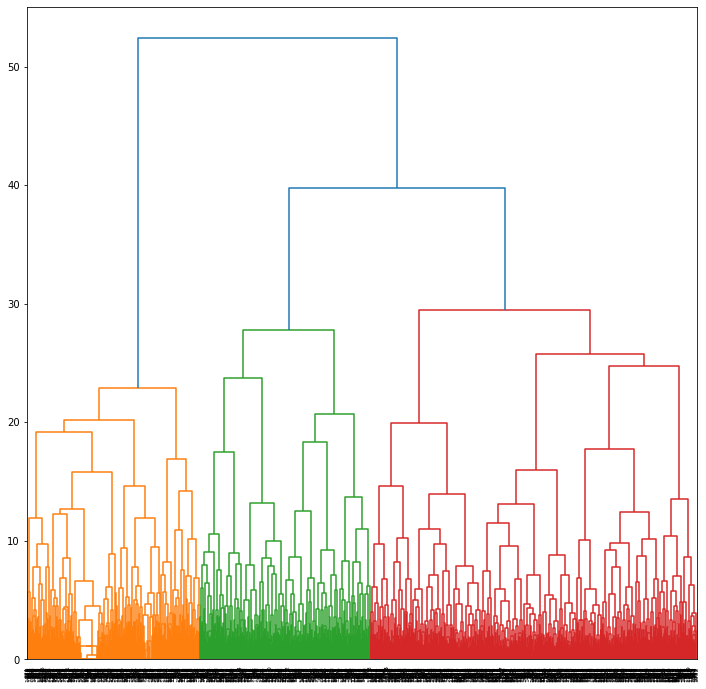

In [88]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [89]:
# INSTANTIATING a k-Means object with five clusters
mobile_k_pca = KMeans(n_clusters   = 4,
                        random_state = 219)


# fitting the object to the data
mobile_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
mobile_kmeans_pca = pd.DataFrame({'Cluster': mobile_k_pca.labels_})


# checking the results
print(mobile_kmeans_pca.iloc[: , 0].value_counts())

3    452
1    410
2    376
0    314
Name: Cluster, dtype: int64


In [90]:
# storing cluster centers
centroids_pca = mobile_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Normal Users',
                            'Savvy Technologists',
                            'Leaders',
                            'Reserved',
                            'Artistic',
                            'Experimental',
                            'Frugal Stylish',
                            'In Person Shopper',
                            'Impulsive Buyer']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Normal Users,Savvy Technologists,Leaders,Reserved,Artistic,Experimental,Frugal Stylish,In Person Shopper,Impulsive Buyer
0,0.54,-0.75,0.35,-0.88,0.34,0.37,0.18,-0.95,0.03
1,-0.64,0.07,-0.41,0.08,-0.38,-0.06,1.03,0.20,0.08
2,0.85,0.40,0.91,0.61,0.20,-0.27,-0.33,0.38,-0.78
3,-0.50,0.12,-0.63,0.02,-0.07,0.03,-0.79,0.17,0.55


Cluster 0 is more likely to be a normal user and less likely to be a savvy technologist.
Cluster 0 is more of leaders and not reserved, they are also artistic and experimental and they are online shoppers
-------------------------------------------------------------------
Cluster 1 is less likely to be normal users and more of a frugal stylish shopping for designs and deals packages so they 
Represent more the shopping online category of deals applications 
----------------------------------------------------------------------
Cluster 2 is more likely to be normal users and have tendency to be savvy technologist and are leaders and can learn new
technological applications and are artistic and reserved so they can be targeted with social network apps, online shopping,
Apps and new technological helpful Apps
-----------------------------------------------------------------------
Cluster 3 is less likely to be anormal user and is more showing the persons who are impulsive buyers and dont mind 
spending the money they earn which can help us target to them in apps purchases.

We are going to analyze each cluster according to the demographic informations
Analyze with Age_groups, Income, types of apps, number of apps, iphone or android user, gender..


In [91]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([ mobile_kmeans_pca,
                          factor_loadings_df],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([team_df.loc[ : , ['age_groups', 'iphone','android','number_apps',
                                                  'Education','Marital Status','income','Gender',
                                                  'music_app','tv_checkin_app','entertainment_app',
                                                  'tv_show_app','gaming_app','social_network_app','tablet',
                                                  'news_app','shopping_app','Yes, children under 6 years old',
                                                  'Yes, children 6-12 years old']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = ['age_groups', 'iphone','android','number_apps',
                              'Education','Marital Status','income','Gender',
                              'music_app','tv_checkin_app','entertainment_app',
                              'tv_show_app','gaming_app','social_network_app',
                              'news_app','shopping_app','Yes, children under 6 years old',
                              'Yes, children 6-12 years old', 'tablet','Cluster','Normal Users',
                              'Savvy Technologists','Leaders','Reserved','Artistic',
                              'Experimental','Frugal Stylish','In Person Shopper',
                              'Impulsive Buyer']


# checking the results
final_pca_clust_df.head(n = 5)

,age_groups,iphone,android,number_apps,Education,Marital Status,income,Gender,music_app,tv_checkin_app,entertainment_app,tv_show_app,gaming_app,social_network_app,news_app,shopping_app,"Yes, children under 6 years old","Yes, children 6-12 years old",tablet,Cluster,Normal Users,Savvy Technologists,Leaders,Reserved,Artistic,Experimental,Frugal Stylish,In Person Shopper,Impulsive Buyer
0,10,0,1,1,3,4,5,1,0,0,0,0,0,1,0,0,0,0,0,0,-0.88,0.30,1.07,-2.15,-2.34,0.39,1.71,-1.72,0.84
1,5,0,1,3,5,1,10,2,0,1,1,1,0,0,0,0,0,1,1,2,2.91,-0.03,2.53,1.89,0.87,-0.37,-1.50,0.46,-0.31
2,7,0,0,1,4,4,6,1,0,0,0,0,1,1,0,0,0,0,0,0,1.19,-1.40,-1.03,-1.94,1.84,-1.26,1.91,-2.31,-1.47
3,7,1,0,2,2,1,5,1,0,0,1,1,0,1,0,0,0,1,1,0,1.84,-2.60,1.91,0.29,1.54,1.12,2.28,-2.78,-0.70
4,2,1,0,2,5,2,4,2,1,0,0,0,0,0,0,0,0,0,0,2,0.85,2.79,2.71,-1.43,-0.27,-1.96,-0.86,-0.44,1.04


In [92]:
# renaming channels
# age_group_names = {'Under 18' : 1,
#                     '18-24' :2,
#                     '25-39' :3,
#                     '30-34' :4,
#                     '35-39' :5,
#                     '40-44' :6,
#                     '45-49' :7,
#                     '50-54' :8,
#                     '55-59' :9,
#                     '60-64' :10,
#                     '65 or over' :11}


# final_pca_clust_df['age_groups'].replace(age_group_names, inplace = True)

###### WE DID NOT RENAME THE AGE GROUPS OR INCOME GROUPS BECAUSE THE ORDER GETS MIXED

# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df.head(n=5)

,age_groups,iphone,android,number_apps,Education,Marital Status,income,Gender,music_app,tv_checkin_app,entertainment_app,tv_show_app,gaming_app,social_network_app,news_app,shopping_app,"Yes, children under 6 years old","Yes, children 6-12 years old",tablet,Cluster,Normal Users,Savvy Technologists,Leaders,Reserved,Artistic,Experimental,Frugal Stylish,In Person Shopper,Impulsive Buyer
0,10,0,1,1,3,4,5,1,0,0,0,0,0,1,0,0,0,0,0,Cluster 1,-0.88,0.30,1.07,-2.15,-2.34,0.39,1.71,-1.72,0.84
1,5,0,1,3,5,1,10,2,0,1,1,1,0,0,0,0,0,1,1,Cluster 3,2.91,-0.03,2.53,1.89,0.87,-0.37,-1.50,0.46,-0.31
2,7,0,0,1,4,4,6,1,0,0,0,0,1,1,0,0,0,0,0,Cluster 1,1.19,-1.40,-1.03,-1.94,1.84,-1.26,1.91,-2.31,-1.47
3,7,1,0,2,2,1,5,1,0,0,1,1,0,1,0,0,0,1,1,Cluster 1,1.84,-2.60,1.91,0.29,1.54,1.12,2.28,-2.78,-0.70
4,2,1,0,2,5,2,4,2,1,0,0,0,0,0,0,0,0,0,0,Cluster 3,0.85,2.79,2.71,-1.43,-0.27,-1.96,-0.86,-0.44,1.04


In [93]:
data_df['iphone'].value_counts()
#50% use iphone = ios

1    781
0    771
Name: iphone, dtype: int64

In [94]:
data_df['android'].value_counts()
#36% of users use android

0    987
1    565
Name: android, dtype: int64

In [95]:
data_df['tablet'].value_counts()
#18% of users use tablets

0    1271
1     281
Name: tablet, dtype: int64

We have 50% users using iphone and ios related applications where as 36% of users use android

In [96]:
data_df['Gender'].value_counts()
# 53% of users are females and 47% is male

2    821
1    731
Name: Gender, dtype: int64

53% of users are females

In [97]:
data_df['social_network_app'].value_counts()
#81% of users use social network apps

1    1262
0     290
Name: social_network_app, dtype: int64

In [98]:
data_df['gaming_app'].value_counts()
#76% use gaming apps

1    1187
0     365
Name: gaming_app, dtype: int64

81% of users use social media applications and 76% of users use gaming apps
This would help us in the recommendations in targeting the ads for each mobile app

In [99]:
data_df['number_apps'].value_counts()


3    546
4    546
2    253
1    145
5     62
Name: number_apps, dtype: int64

Almost 70% of the users either have 3 or 4 applications on their device and around 9% of users have only 1 application


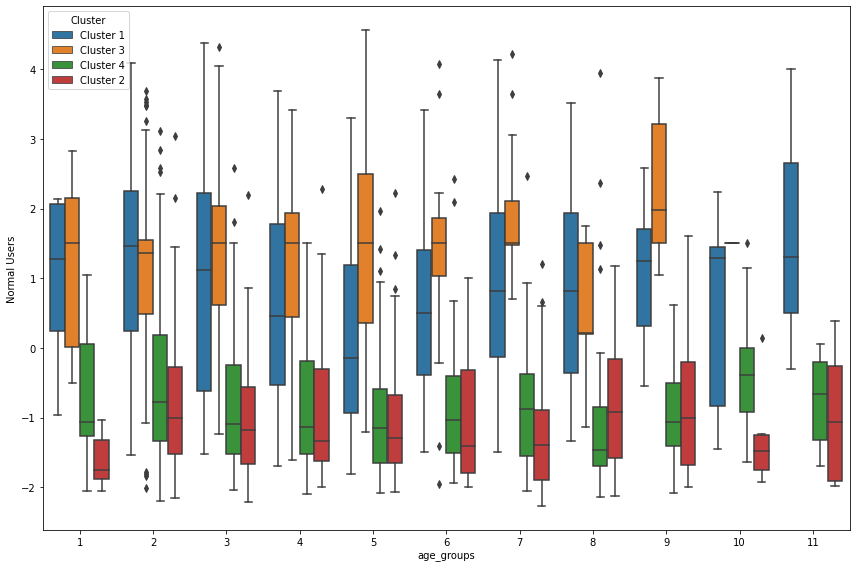

In [100]:
########################
# Age_Groups
########################

# Normal Users
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Normal Users',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

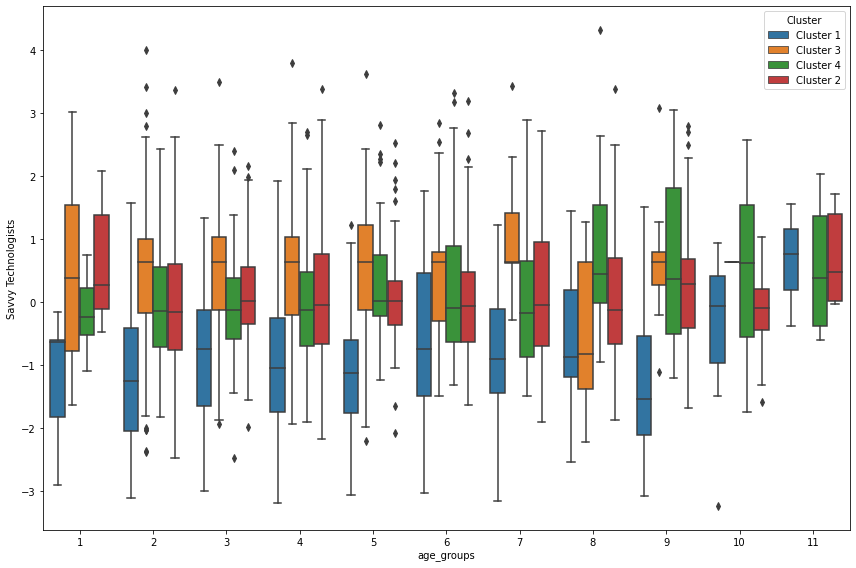

In [101]:
########################
# Age_Groups
########################

# Savvy Technologists
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Savvy Technologists',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

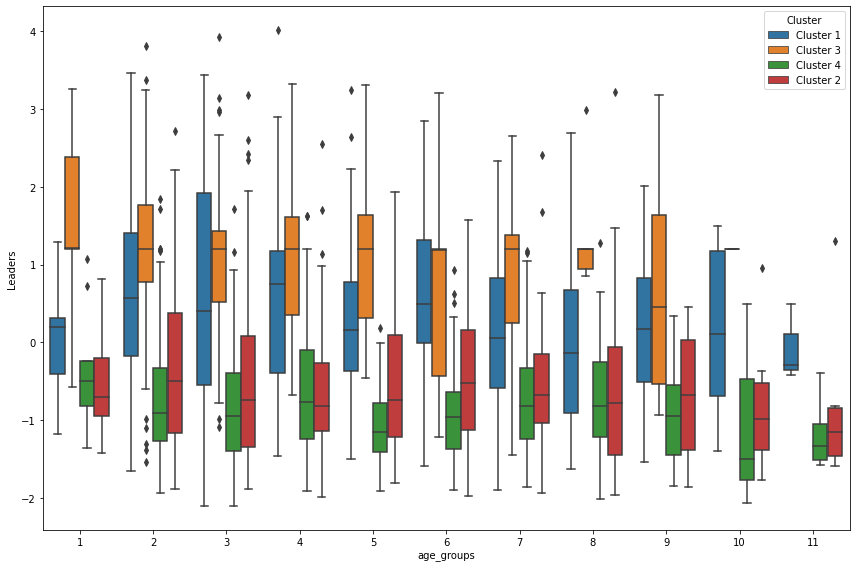

In [102]:
########################
# Age_Groups
########################

# Leaders
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Leaders',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

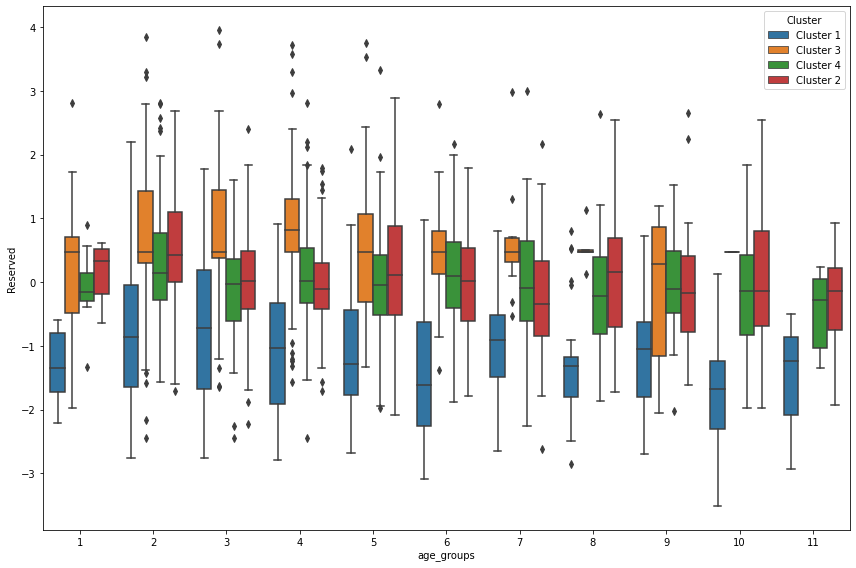

In [103]:
########################
# Age_Groups
########################

# Reserved
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Reserved',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

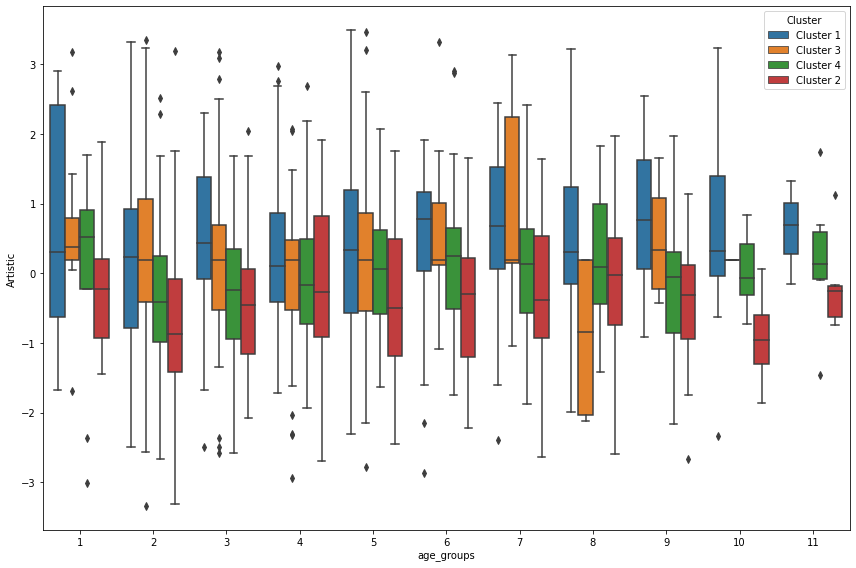

In [104]:
########################
# Age_Groups
########################

# Artistic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Artistic',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

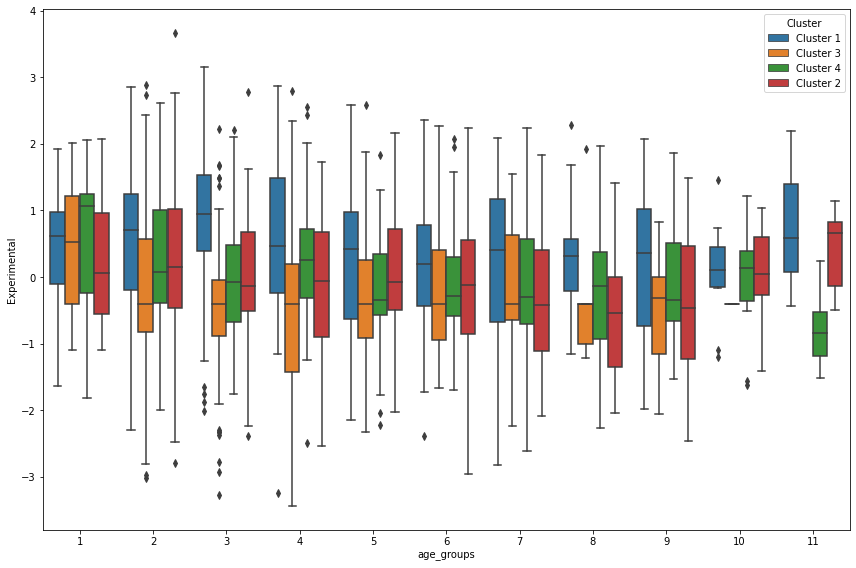

In [105]:
########################
# Age_Groups
########################

# Experimental
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Experimental',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

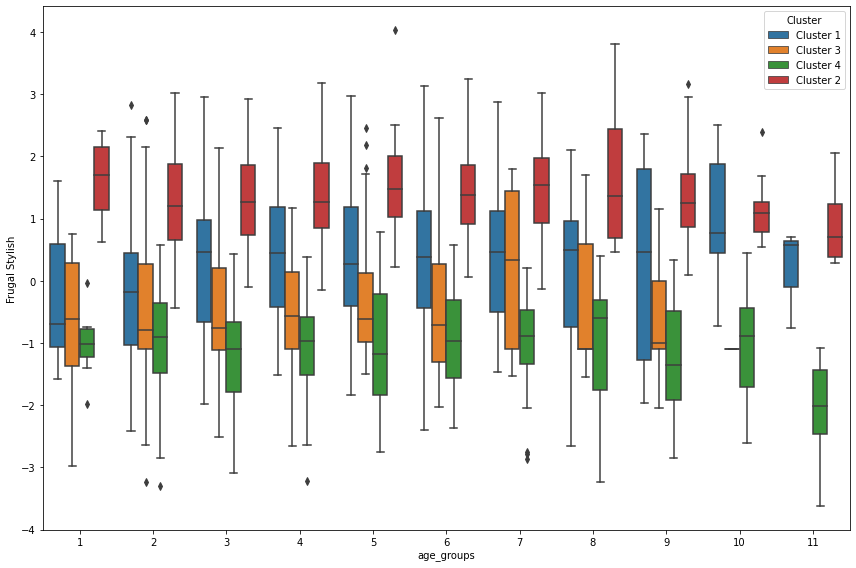

In [106]:
########################
# Age_Groups
########################

# Frugal Stylish
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Frugal Stylish',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

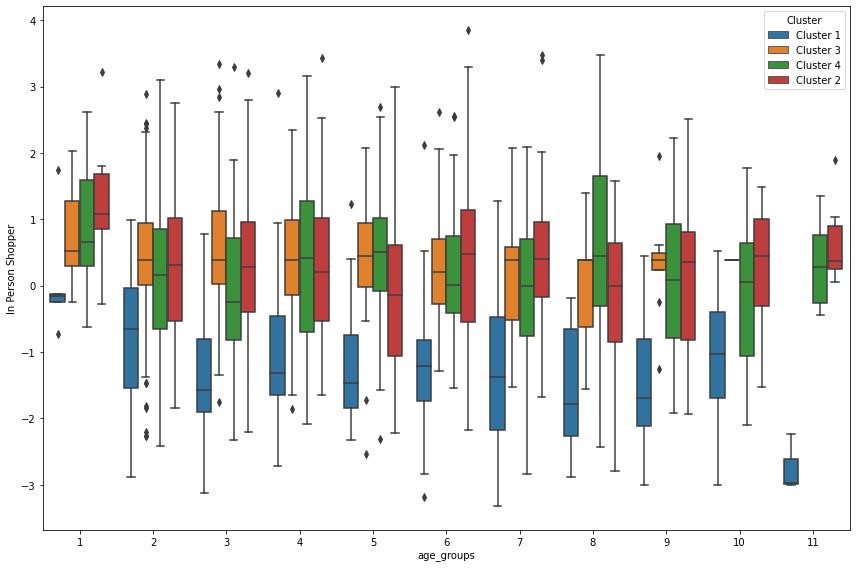

In [107]:
########################
# Age_Groups
########################

#In Person Shopper
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'In Person Shopper',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

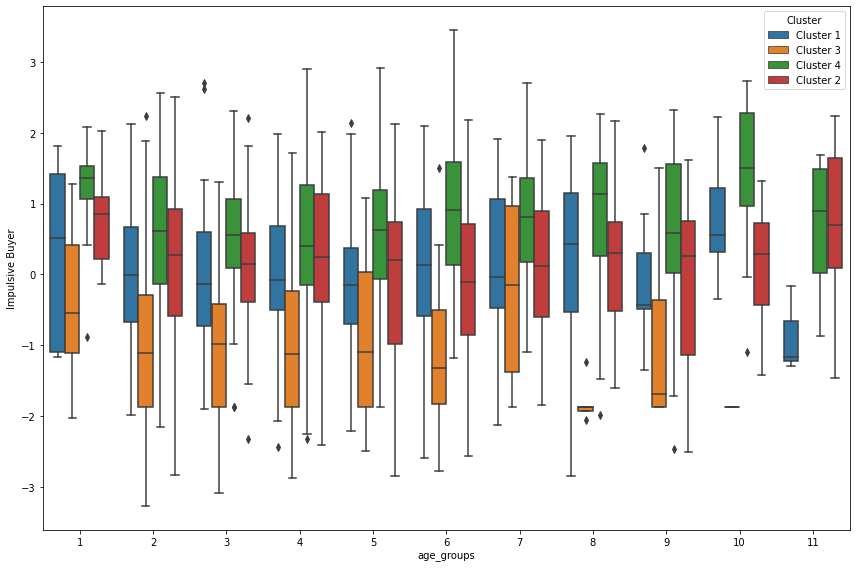

In [108]:
########################
# Age_Groups
########################

# Impulsive Buyer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'age_groups',
            y = 'Impulsive Buyer',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

### Insights for AGE_GROUPS:
  

#### Cluster 1: 
    
- Normal users for all ages, 

- Leaders ages until 49, 

- Artistic for all ages, 

- Experimental for all ages online shopping from 18 + above, 

#### Cluster 2:

- Likely to be a savvy tech 

- More likely to be reserved

- Frugal stylish for all ages


#### Cluster 3:
    
- Normal users until 55 years

- Savvy Technologists until 45 years

- Leaders until 55 years

- Artistic 45 to 49

- In-person Shopper 18 to 34 

#### Cluster 4:
    
- More likely to be Savvy technology from age 30 until above 65

- Experimental until age 29 

- In-person Shopper all ages 

- Impulsive buyer all ages 



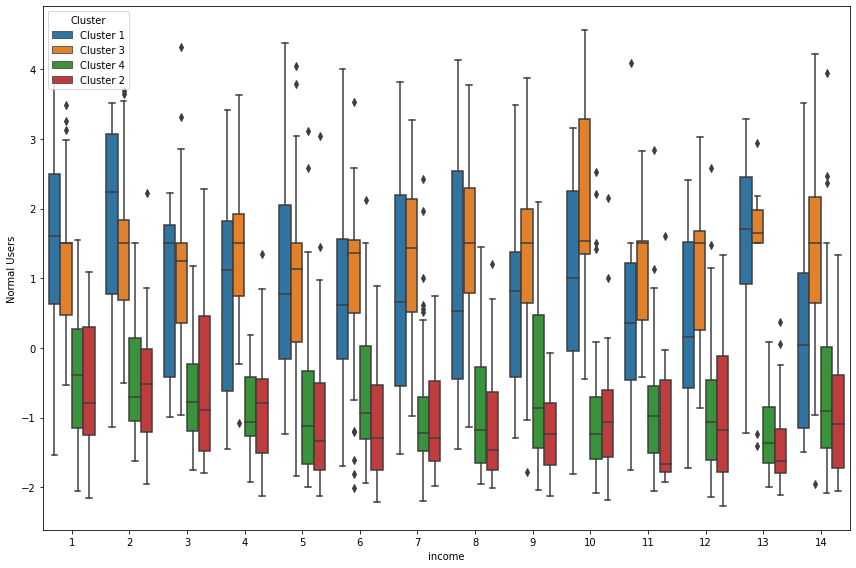

In [109]:
########################
# Income
########################

# Normal Users
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Normal Users',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

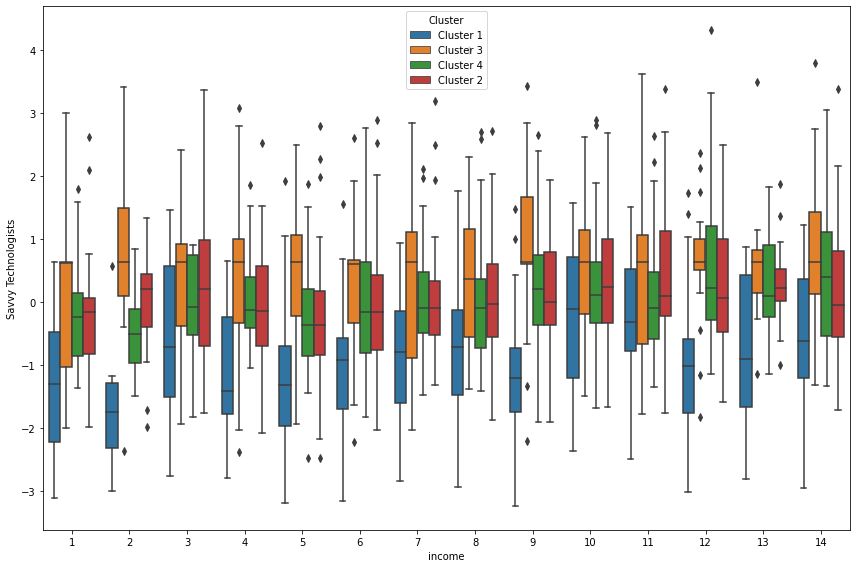

In [110]:
########################
# Income
########################

# Savvy Technologists
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Savvy Technologists',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

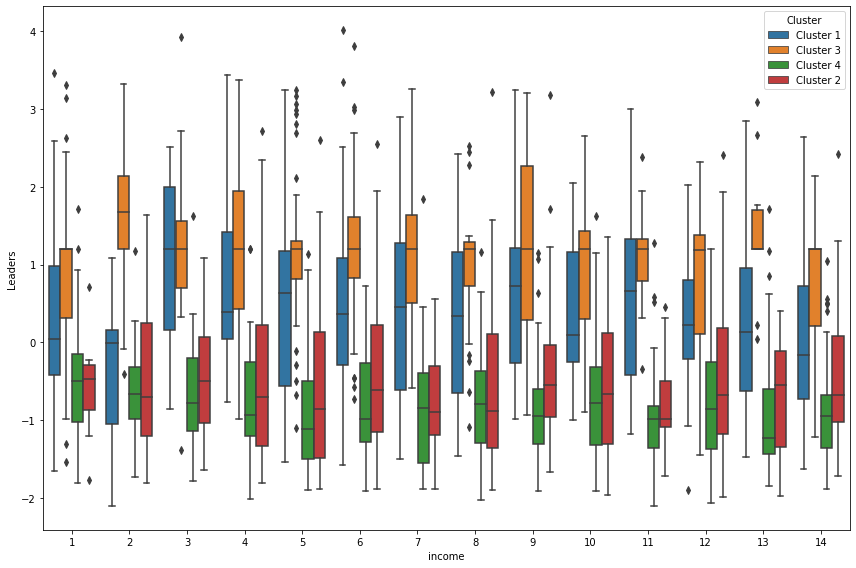

In [111]:
########################
# Income
########################

# Leaders
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Leaders',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

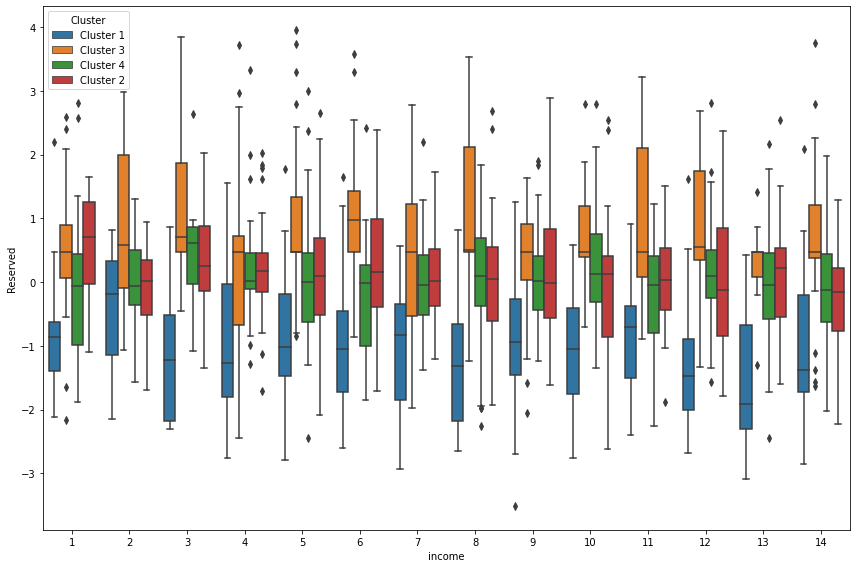

In [112]:
########################
# Income
########################

# Reserved
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Reserved',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

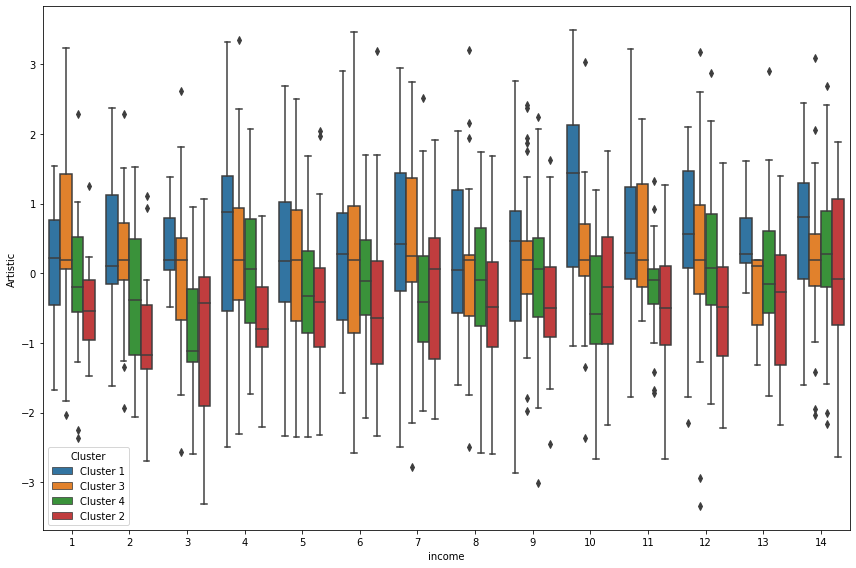

In [113]:
########################
# Income
########################

# Artistic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Artistic',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

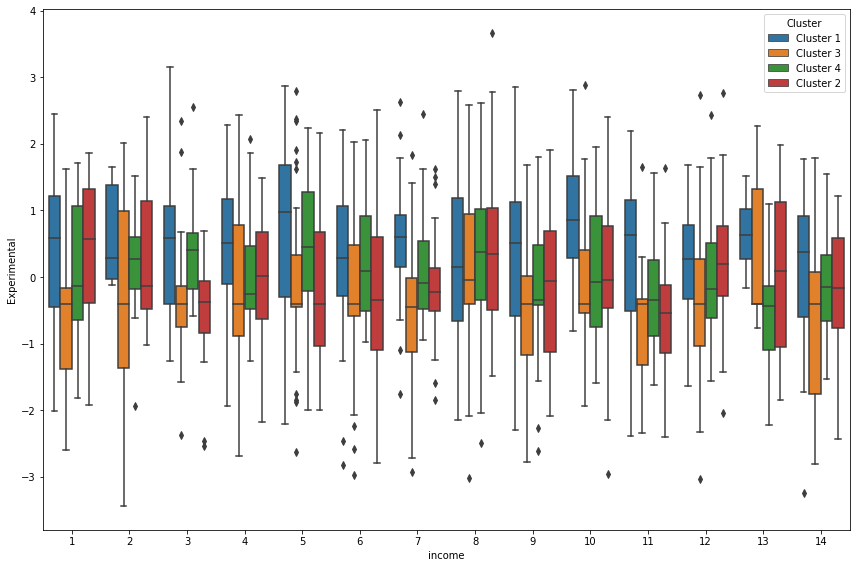

In [114]:
########################
# Income
########################

# Experimental
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Experimental',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

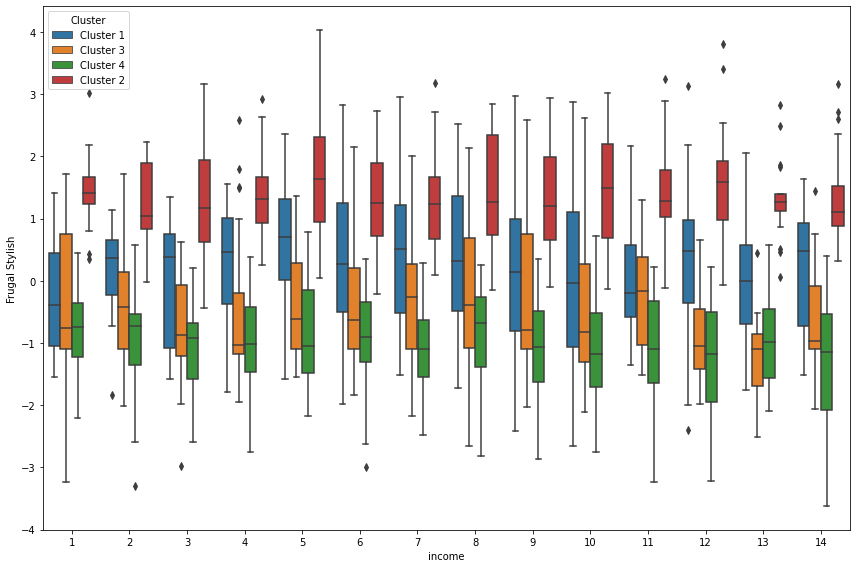

In [115]:
########################
# Income
########################

# Frugal Stylish
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Frugal Stylish',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

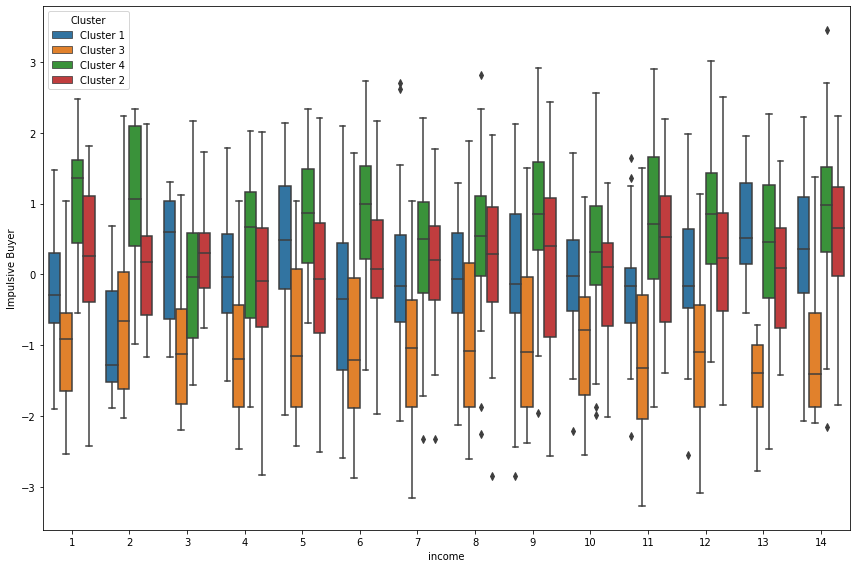

In [116]:
########################
# Income
########################

# Impulsive Buyer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'Impulsive Buyer',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

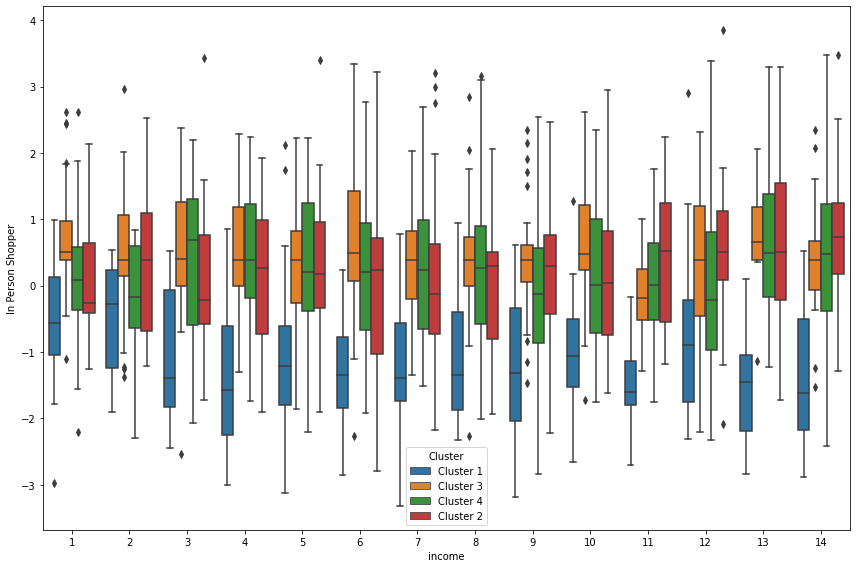

In [117]:
########################
# Income
########################

# In Person Shopper
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'income',
            y = 'In Person Shopper',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

### INSIGHTS for Income_GROUPS:
  

#### Cluster 1: 
    
- Normal until above 70 K annually, 

- Artistic for all incomes 

- Online Shopper

- Experimental 

#### Cluster 2:

- Open to technology as income increases

- Reserve from income under for income under 10k

- Frugal stylus for all incomes 


#### Cluster 3:
    
- Normal users 

- Savvy Technologists

- Leaders until

- Artistic

- In-person Shopper 

#### Cluster 4:
    
- More likely to be Savvy technology for all incomes

- Experimental for all incomes

- Impulsive buyer all incomes



## Final Overview for Marketing Department ##



### Recommendation for Cluster 1:
We strongly suggest the marketing department target this cluster with applications that relate to social networking, art, online shopping, news apps, that need to be experimented with because this cluster represents the group of normal users who are experimental after age 18, artistic and is open to innovation. Networking apps are a great fit for this cluster and therefore, it is best to place the ads. 

We would recommend doing ads on social apps and search engines such as Facebook, Instagram, and Tiktok. High correlation of time spend on social networking apps and connecting with family and friends. 




### Recommendation for Cluster 2: 
The marketing department should target applications that are more technical and complex to use since consumers are into technology and have a deep knowledge of it, such as designing apps, gaming, and shopping apps that include package deals with new designers since they tend to be frugal consumers. 

It could include an app that connects retail clothing stores together or apps that recommend deals from many companies. Applications should be very eye catching and implement deals. It is recommended to place the ads on existing shopping, gaming apps in high volumes because it is cheaper than advertising on Facebook or Google. 

Additionally, our insights are showing that as these users are frugal one of the incentives that could be created to increase app download would be to create accrued In-App rewards. According to The Manifest, 63 percent of organizations give accumulated in-app prizes, such as points or coins, to incentivize a download. Rewards can be more successful in fostering long-term app engagement than freebies or promotions.


### Recommendation for Cluster 3
Our first recommendation is to integrate location-based marketing to target our customers when they enter a high shopping zone as these users are mainly in-person shoppers. We can integrate this by using geo-fencing, geo-conquesting, and proximity marketing. This would be most beneficial within the social media and social networking apps, as it could lead to a change of habits through consistent subliminal marketing. 

Secondly, regarding consumer apps in this category, the most beneficial would be apps linked directly to an already established brand, where consumers are the consumers able to get the benefits of in-store discounts through downloading the app. This lowers the barriers of Entry as a consumer is intrinsically motivated to install the application. 

An example of this can be downloading the Pink by Victoria's Secret app which gives you a 50% discount on certain items which has shown that the app is 63% times more likely to get downloaded than without the promotion. 


### Recommendation for Cluster 4:
The marketing team can target this group if they are planning to launch music and gaming apps with more in-app purchases or subscriptions. Complex applications with more technical content and knowledge in the technical field such as Cloud and Mail-related apps can be introduced to these groups because they are more likely to get updated with the latest technology.

The majority of ads for technological apps can be promoted and paid positioning on search engines. When looking at gaming and music apps, it is better to have ads placements on famous social media networks. 
